# Tabular Feasibility

This project focuses detecting thrrats in network traffic. This dataset, part of the UNSW-NB15 benchmark, provides labeled data for normal and attack sessions.

Dataset Description:
The dataset contains 82,332 rows and 45 features, including both numerical and categorical types. The label column is the target, where 0 indicates a normal session and 1 an attack.


---

Machine Learning Task:

Type: Supervised Classification (Binary)

Target Variable: label

Encoding: 0 = Normal, 1 = Attack

---


Class Distribution:

Normal (0): 37,000 samples

Attack (1): 45,332 samples

The classes are relatively balanced.

# Data Loading and Initial Look

In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df= pd.read_csv("UNSW_NB15_training-set.csv")
df = df.drop('id', axis=1)
df.head()

dur proto service state  spkts  dpkts  sbytes  dbytes         rate  \
0  0.000011   udp       -   INT      2      0     496       0   90909.0902   
1  0.000008   udp       -   INT      2      0    1762       0  125000.0003   
2  0.000005   udp       -   INT      2      0    1068       0  200000.0051   
3  0.000006   udp       -   INT      2      0     900       0  166666.6608   
4  0.000010   udp       -   INT      2      0    2126       0  100000.0025   

   sttl  ...  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  ct_ftp_cmd  \
0   254  ...                 1               2             0           0   
1   254  ...                 1               2             0           0   
2   254  ...                 1               3             0           0   
3   254  ...                 1               3             0           0   
4   254  ...                 1               3             0           0   

   ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports  attack_cat  \
0                 0           1           2                0      Normal   
1                 0           1           2                0      Normal   
2                 0           1           3                0      Normal   
3                 0           2           3                0      Normal   
4                 0           2           3                0      Normal   

   label  
0      0  
1      0  
2      0  
3      0  
4      0  

[5 rows x 44 columns]

In [156]:
# EDA Analysis

# shape of the dataset
print(" Dataset shape:", df.shape)
print("--"*20)
# information about the dataset
print("\n\Feeature Info:\n", df.info())
print("--"*20)
# descriptive statistics of numerical col
print("\nDescriptive statistics:\n", df.describe())

 Dataset shape: (82332, 44)
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 44 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   dur                82332 non-null  float64
 1   proto              82332 non-null  object 
 2   service            82332 non-null  object 
 3   state              82332 non-null  object 
 4   spkts              82332 non-null  int64  
 5   dpkts              82332 non-null  int64  
 6   sbytes             82332 non-null  int64  
 7   dbytes             82332 non-null  int64  
 8   rate               82332 non-null  float64
 9   sttl               82332 non-null  int64  
 10  dttl               82332 non-null  int64  
 11  sload              82332 non-null  float64
 12  dload              82332 non-null  float64
 13  sloss              82332 non-null  int64  
 14  dloss              82332 non-null  int64  
 15  s

In [157]:
# Determine feature types and value ranges
feature_summary = []
for col in df.columns:
    col_type = df[col].dtype
    if col_type == 'object':
        unique_vals = df[col].dropna().unique()
        values_summary = ', '.join(map(str, unique_vals[:5])) + ('...' if len(unique_vals) > 5 else '')
        feature_type = 'categorical'
        value_range = values_summary
    else:
        feature_type = 'numerical'
        value_range = f"{df[col].min()} to {df[col].max()}"

    num_missing = df[col].isnull().sum()
    feature_summary.append({
        'Feature': col,
        'Type': feature_type,
        'Value Range': value_range,
        'Missing Values': num_missing
    })

feature_summary_df = pd.DataFrame(feature_summary)
display(feature_summary_df.head(10))

Feature         Type                      Value Range  Missing Values
0      dur    numerical                 0.0 to 59.999989               0
1    proto  categorical     udp, arp, tcp, igmp, ospf...               0
2  service  categorical  -, http, ftp, ftp-data, smtp...               0
3    state  categorical       INT, FIN, REQ, ACC, CON...               0
4    spkts    numerical                       1 to 10646               0
5    dpkts    numerical                       0 to 11018               0
6   sbytes    numerical                   24 to 14355774               0
7   dbytes    numerical                    0 to 14657531               0
8     rate    numerical               0.0 to 1000000.003               0
9     sttl    numerical                         0 to 255               0

In [158]:
categorical_features = df.select_dtypes(include='object').columns.tolist()
print("Categorical features:", categorical_features)

for col in categorical_features:
    print(f"\nUnique values for '{col}':")
    print(df[col].unique())

Categorical features: ['proto', 'service', 'state', 'attack_cat']

Unique values for 'proto':
['udp' 'arp' 'tcp' 'igmp' 'ospf' 'sctp' 'gre' 'ggp' 'ip' 'ipnip' 'st2'
 'argus' 'chaos' 'egp' 'emcon' 'nvp' 'pup' 'xnet' 'mux' 'dcn' 'hmp' 'prm'
 'trunk-1' 'trunk-2' 'xns-idp' 'leaf-1' 'leaf-2' 'irtp' 'rdp' 'netblt'
 'mfe-nsp' 'merit-inp' '3pc' 'idpr' 'ddp' 'idpr-cmtp' 'tp++' 'ipv6' 'sdrp'
 'ipv6-frag' 'ipv6-route' 'idrp' 'mhrp' 'i-nlsp' 'rvd' 'mobile' 'narp'
 'skip' 'tlsp' 'ipv6-no' 'any' 'ipv6-opts' 'cftp' 'sat-expak' 'ippc'
 'kryptolan' 'sat-mon' 'cpnx' 'wsn' 'pvp' 'br-sat-mon' 'sun-nd' 'wb-mon'
 'vmtp' 'ttp' 'vines' 'nsfnet-igp' 'dgp' 'eigrp' 'tcf' 'sprite-rpc' 'larp'
 'mtp' 'ax.25' 'ipip' 'aes-sp3-d' 'micp' 'encap' 'pri-enc' 'gmtp' 'ifmp'
 'pnni' 'qnx' 'scps' 'cbt' 'bbn-rcc' 'igp' 'bna' 'swipe' 'visa' 'ipcv'
 'cphb' 'iso-tp4' 'wb-expak' 'sep' 'secure-vmtp' 'xtp' 'il' 'rsvp' 'unas'
 'fc' 'iso-ip' 'etherip' 'pim' 'aris' 'a/n' 'ipcomp' 'snp' 'compaq-peer'
 'ipx-n-ip' 'pgm' 'vrrp' 'l2tp' 'zer

In [159]:
# Check for outliers
outliers = {}
for col in df.select_dtypes(include='number').columns:
    mean = df[col].mean()
    std = df[col].std()
    outliers[col] = ((df[col] < mean - 3*std) | (df[col] > mean + 3*std)).sum()

outliers_df = pd.DataFrame(list(outliers.items()), columns=['Feature', 'Outlier Count'])

num_rows, num_features = df.shape
missing_values = df.isnull().sum()
missing_summary = missing_values[missing_values > 0]

display(outliers_df.head(45))

Feature  Outlier Count
0                 dur           1063
1               spkts            218
2               dpkts            701
3              sbytes            102
4              dbytes            649
5                rate           1036
6                sttl              0
7                dttl              0
8               sload           1372
9               dload           2737
10              sloss            127
11              dloss            653
12             sinpkt            912
13             dinpkt            437
14               sjit            579
15               djit            610
16               swin              0
17              stcpb              0
18              dtcpb              0
19               dwin              0
20             tcprtt            638
21             synack            544
22             ackdat            633
23              smean           2840
24              dmean           3001
25        trans_depth             34
26  response_body_len            224
27         ct_srv_src           2235
28       ct_state_ttl           1805
29         ct_dst_ltm           2644
30   ct_src_dport_ltm           2583
31   ct_dst_sport_ltm           3195
32     ct_dst_src_ltm           2372
33       is_ftp_login            678
34         ct_ftp_cmd            680
35   ct_flw_http_mthd            654
36         ct_src_ltm           2408
37         ct_srv_dst           2184
38    is_sm_ips_ports            916
39              label              0

In [160]:
print(df.label.value_counts())

label
1    45332
0    37000
Name: count, dtype: int64


The classes are relatively balanced. Normal = 0 and Attack = 1. There are also 9 different attack types that count for 'Attack'.

# Data Visualization

In [161]:
label_col = 'label'
features = df.columns.drop(label_col)

numerical_features = df.select_dtypes(include=np.number).columns.drop(label_col, errors='ignore')
categorical_features = df.select_dtypes(include='object').columns.tolist()

# --- Summarize Categorical Features (Tables/Count Plots) ---
if len(categorical_features) > 0:
    print("\nSummarizing categorical features with tables/count plots...")
    for feature in categorical_features:
        print(f"\nDistribution of '{feature}' by label:")
        display(pd.crosstab(df[feature], df[label_col]))

else:
    print("\nNo categorical features to summarize.")


Summarizing categorical features with tables/count plots...

Distribution of 'proto' by label:


label      0   1
proto           
3pc        0  32
a/n        0  32
aes-sp3-d  0  32
any        0  96
argus      0  33
...       ..  ..
wsn        0  32
xnet       0  33
xns-idp    0  34
xtp        0  32
zero       0  32

[131 rows x 2 columns]


Distribution of 'service' by label:


label         0      1
service               
-         27375  19778
dhcp          0     26
dns        3068  18299
ftp         758    794
ftp-data    949    447
http       4013   4274
irc           0      5
pop3          0    423
radius        2      7
smtp        635   1216
snmp          0     29
ssh         200      4
ssl           0     30


Distribution of 'state' by label:


label      0      1
state              
ACC        2      2
CLO        0      1
CON     6633    349
FIN    24172  15167
INT     4485  29678
REQ     1707    135
RST        1      0


Distribution of 'attack_cat' by label:


label               0      1
attack_cat                  
Analysis            0    677
Backdoor            0    583
DoS                 0   4089
Exploits            0  11132
Fuzzers             0   6062
Generic             0  18871
Normal          37000      0
Reconnaissance      0   3496
Shellcode           0    378
Worms               0     44

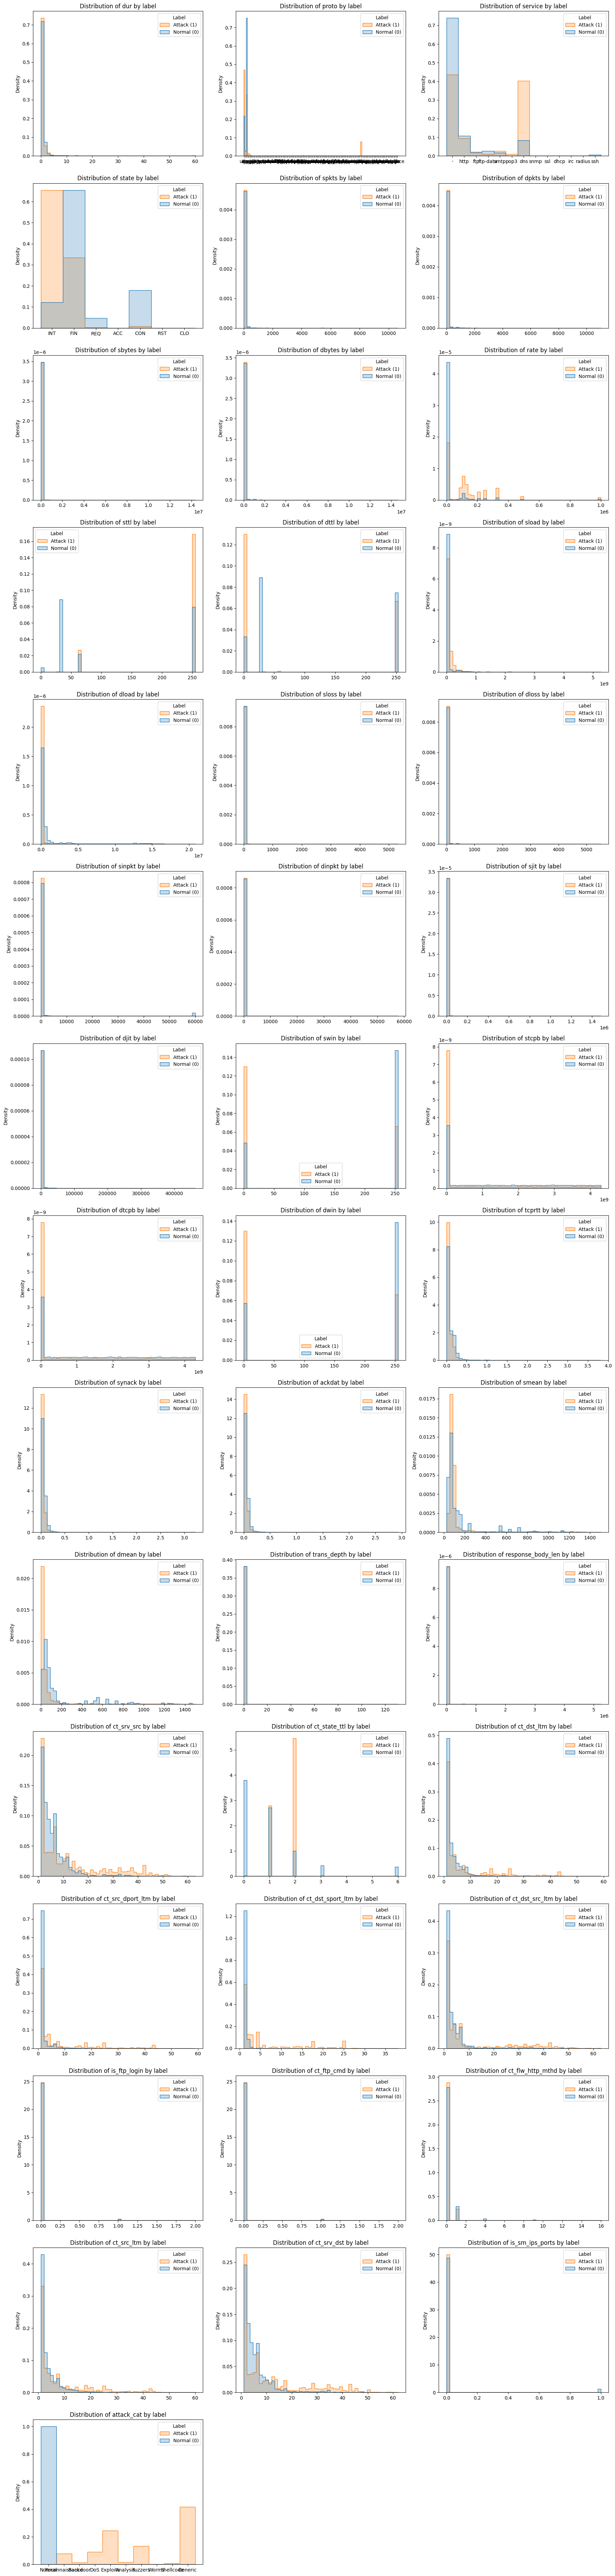

In [162]:
label_col = 'label'
features_to_visualize = df.columns.drop(label_col) # Exclude the target variable

n_features = len(features_to_visualize)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten()

# Plot histograms for each feature
for idx, feature in enumerate(features_to_visualize):
    sns.histplot(data=df, x=feature, hue=label_col, bins=50, kde=False,
                 element="step", stat="density", common_norm=False, ax=axes[idx])
    axes[idx].set_title(f'Distribution of {feature} by label')
    axes[idx].set_xlabel('')
    axes[idx].set_ylabel('Density')
    axes[idx].legend(title='Label', labels=['Attack (1)', 'Normal (0)']) # Add legend

for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Generating refined histograms for numerical features...


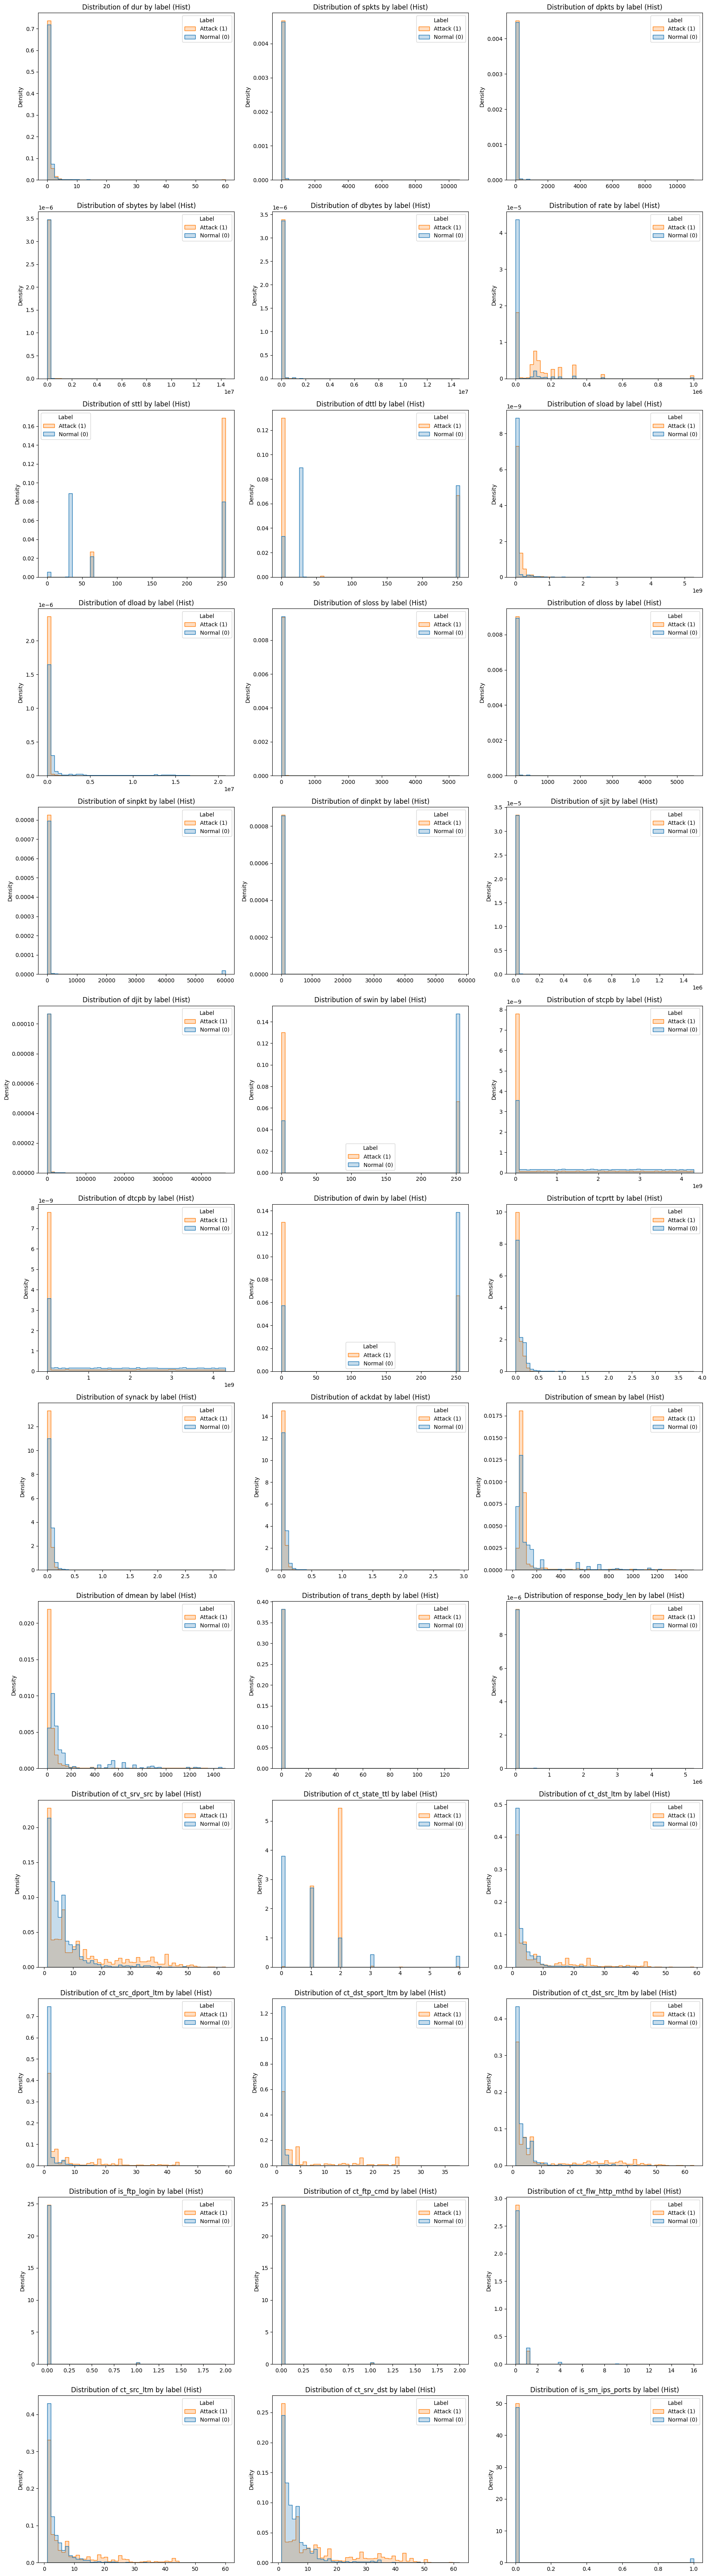


Generating density plots (KDE) for numerical features...


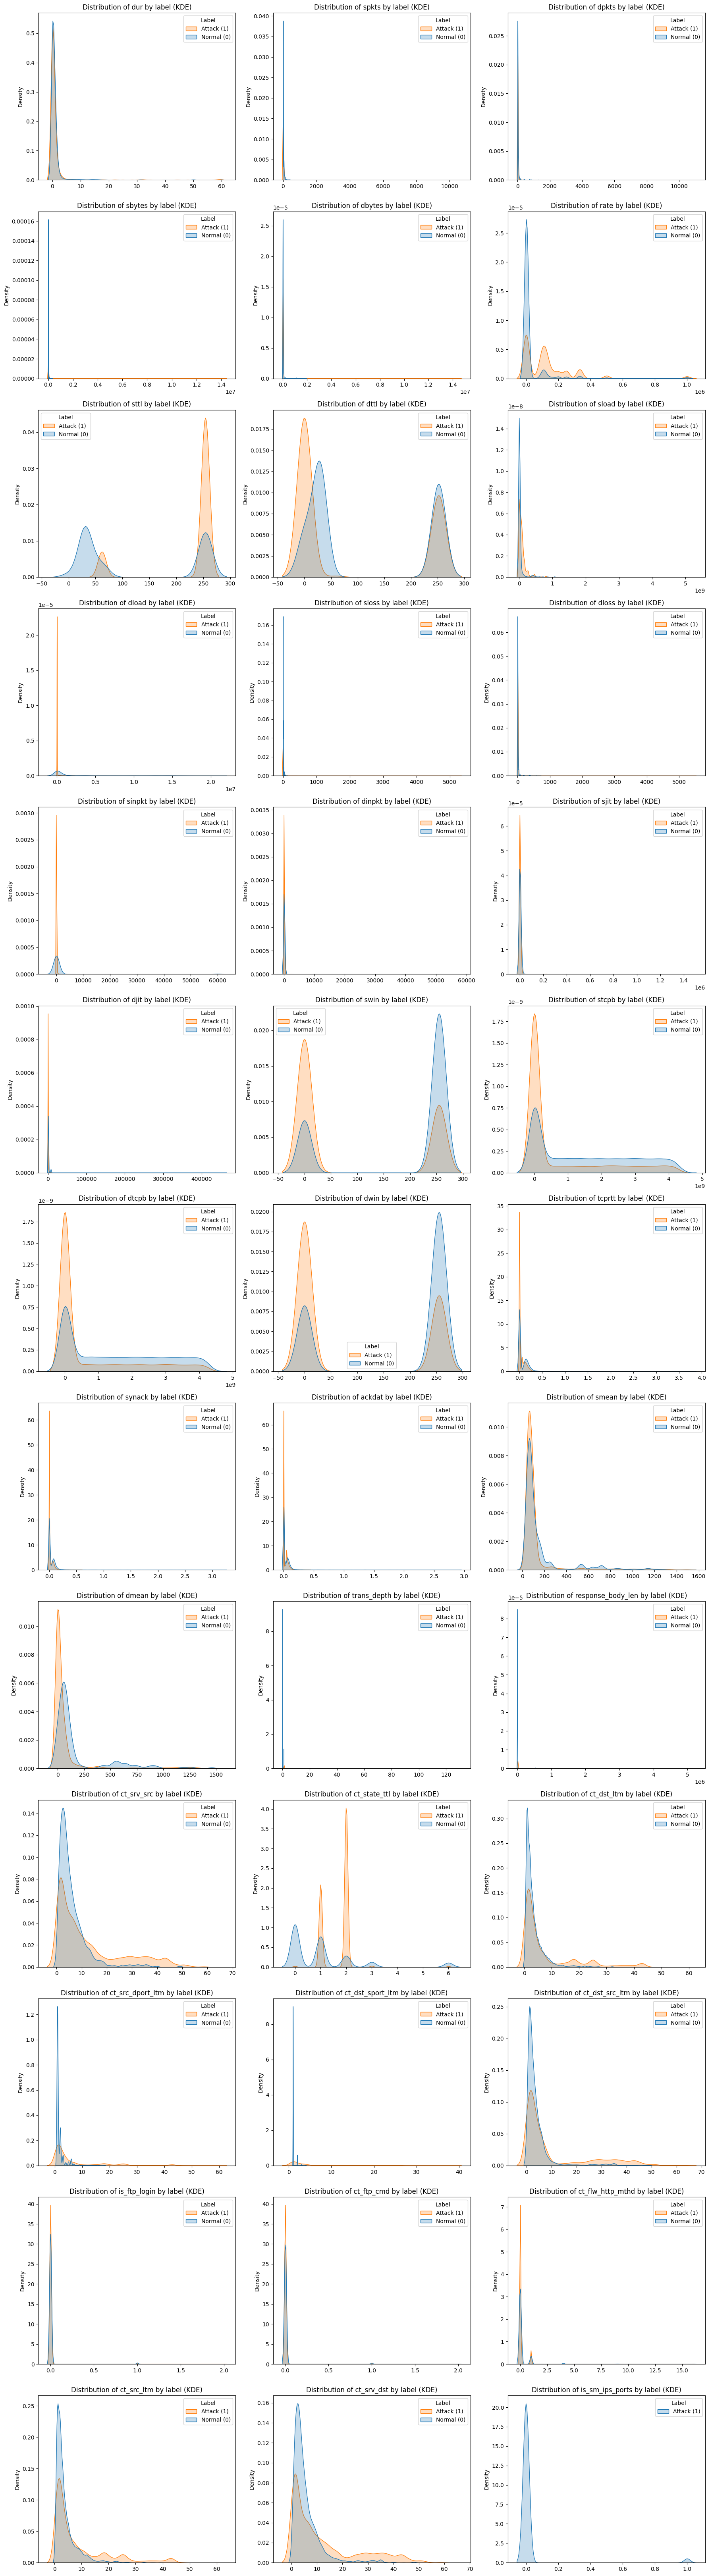

In [163]:
# --- Refined Histograms ---
if len(numerical_features) > 0:
    print("Generating refined histograms for numerical features...")
    n_num_features = len(numerical_features)
    n_cols = 3
    n_rows = (n_num_features + n_cols - 1) // n_cols

    num_bins = 50

    fig_hist, axes_hist = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
    axes_hist = axes_hist.flatten()

    for idx, feature in enumerate(numerical_features):
        sns.histplot(data=df, x=feature, hue=label_col, bins=num_bins, kde=False,
                     element="step", stat="density", common_norm=False, ax=axes_hist[idx])
        axes_hist[idx].set_title(f'Distribution of {feature} by label (Hist)')
        axes_hist[idx].set_xlabel('')
        axes_hist[idx].set_ylabel('Density')
        axes_hist[idx].legend(title='Label', labels=['Attack (1)', 'Normal (0)'])
    for j in range(idx + 1, len(axes_hist)):
        fig_hist.delaxes(axes_hist[j])

    plt.tight_layout()
    plt.show()

# --- Density Plots (KDE) ---
if len(numerical_features) > 0:
    print("\nGenerating density plots (KDE) for numerical features...")
    n_num_features = len(numerical_features)
    n_cols = 3
    n_rows = (n_num_features + n_cols - 1) // n_cols

    fig_kde, axes_kde = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
    axes_kde = axes_kde.flatten()

    for idx, feature in enumerate(numerical_features):
        sns.kdeplot(data=df, x=feature, hue=label_col, common_norm=False, ax=axes_kde[idx], fill=True)
        axes_kde[idx].set_title(f'Distribution of {feature} by label (KDE)')
        axes_kde[idx].set_xlabel('')
        axes_kde[idx].set_ylabel('Density')
        axes_kde[idx].legend(title='Label', labels=['Attack (1)', 'Normal (0)'])

    for j in range(idx + 1, len(axes_kde)):
        fig_kde.delaxes(axes_kde[j])

    plt.tight_layout()
    plt.show()

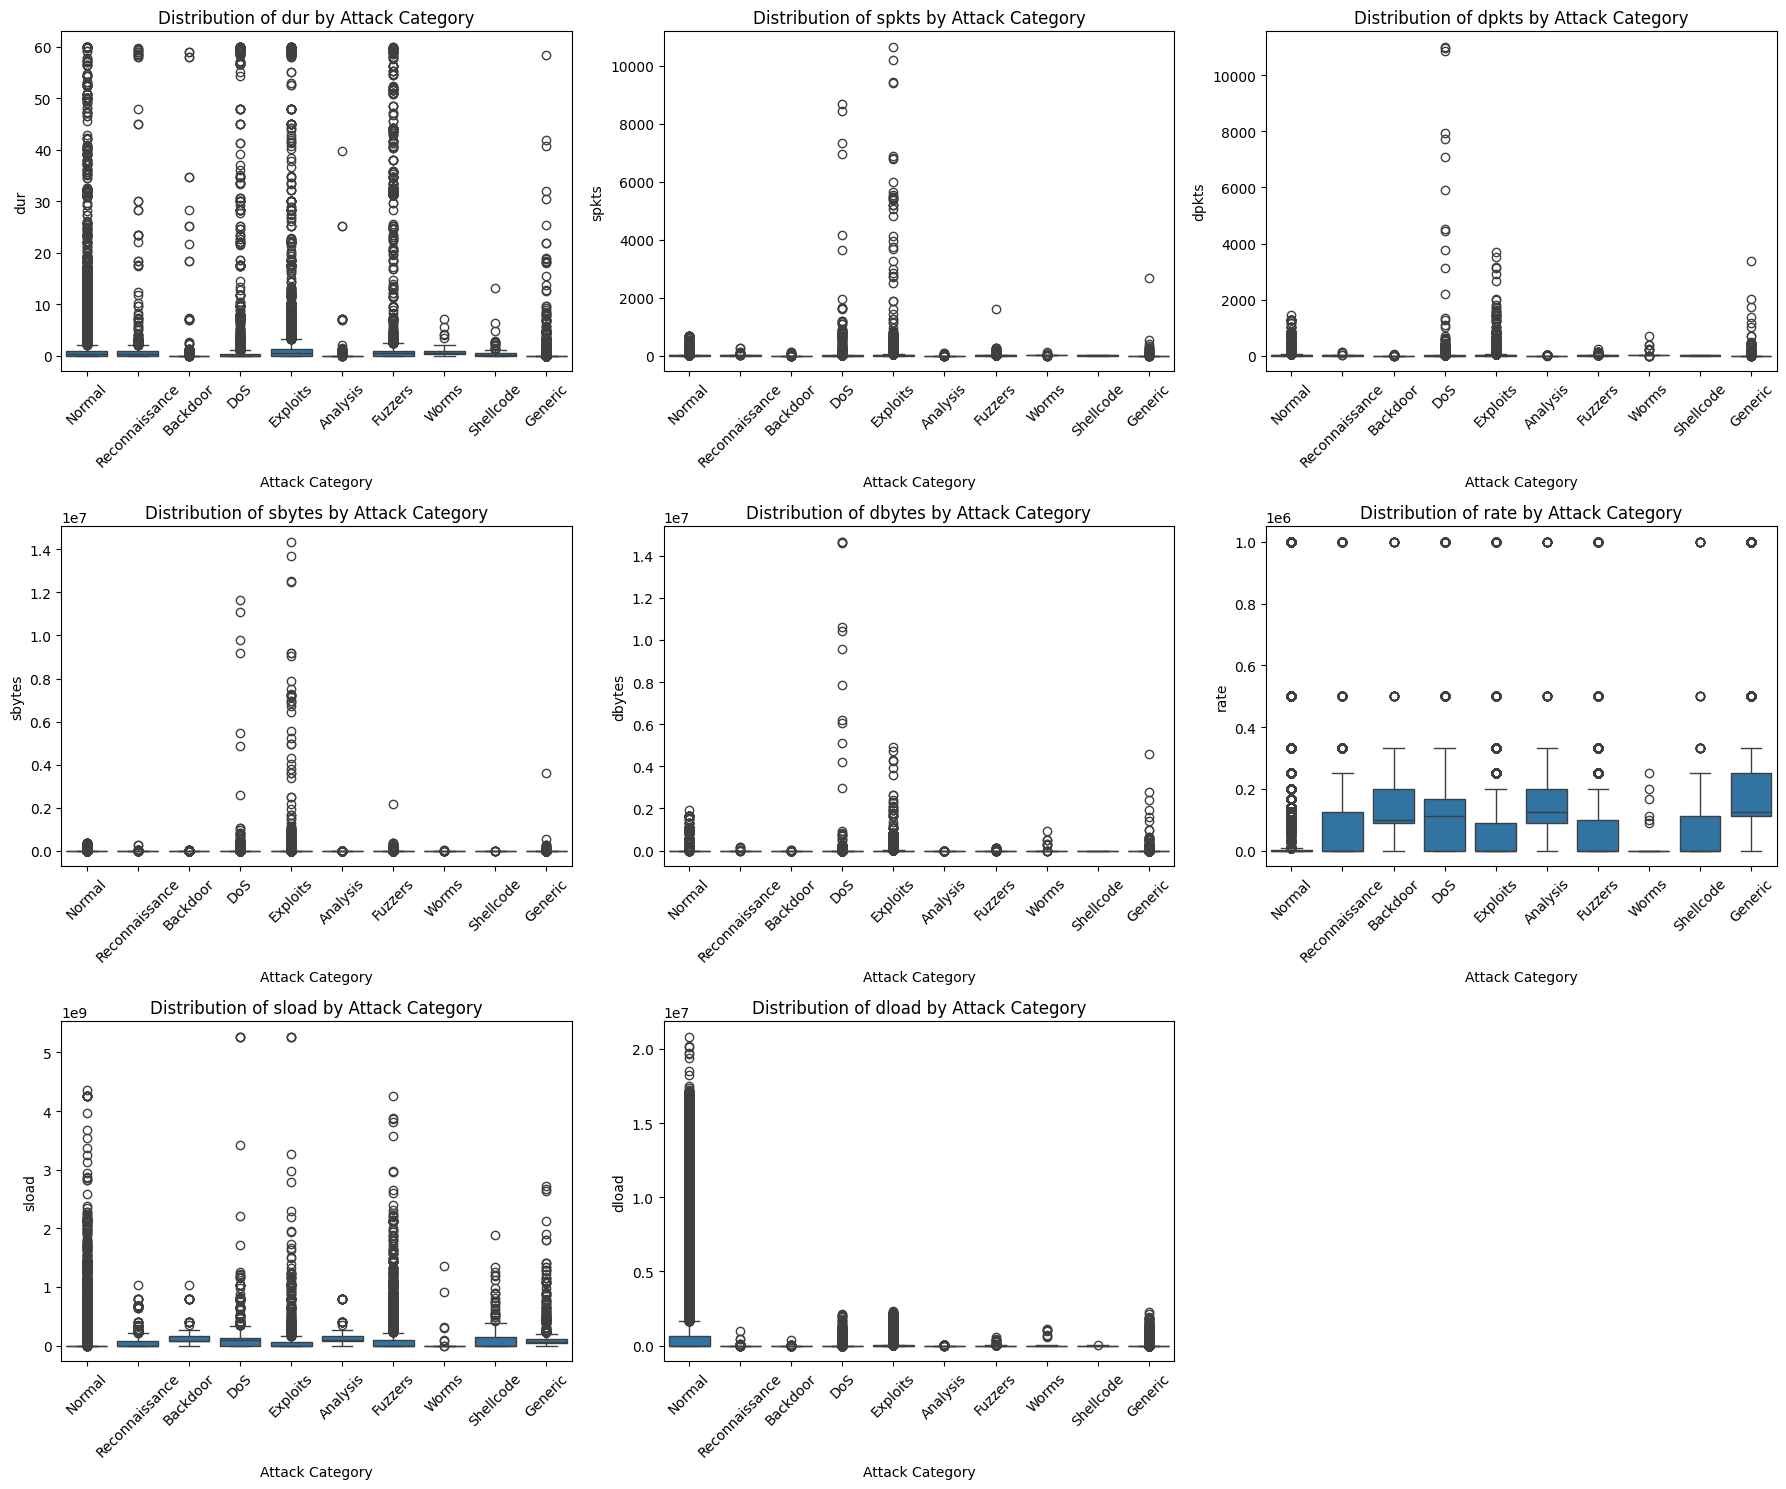

In [202]:
# Visualize feature distributions by attack category for a selection of numerical features
numerical_features_for_viz = ['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sload', 'dload'] # Select a few key numerical features

n_features_viz = len(numerical_features_for_viz)
n_cols_viz = 3
n_rows_viz = (n_features_viz + n_cols_viz - 1) // n_cols_viz

fig, axes = plt.subplots(n_rows_viz, n_cols_viz, figsize=(18, 5 * n_rows_viz))
axes = axes.flatten()

for i, feature in enumerate(numerical_features_for_viz):
    sns.boxplot(data=df, x='attack_cat', y=feature, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature} by Attack Category')
    axes[i].set_xlabel('Attack Category')
    axes[i].set_ylabel(feature)
    axes[i].tick_params(axis='x', rotation=45)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Data Cleaning and Preperation for Machine Learning

Outlier Handling:
Based on the  data analysis and the histograms, many numerical features have significant outlier counts.
Given the potential use of tree-based models (like Decision Trees, Random Forests, or Gradient Boosting) which are robust to outliers, there will be no outlier handling.
This  avoids potential loss of information that outliers might represent in network traffic data, which could be indicative of anomalous behavior.


Analysis of numerical features and rescaling :
Observing the descriptive statistics, it is evident that the numerical features have different scales and distributions.
For example, 'dur' has a range from 0.0 to nearly 60, while 'sbytes' ranges from 24 to over 14 million.
Features like 'rate' and 'sload' also show very large maximum values compared to their means.
This wide variation in scales can negatively impact the performance of some machine learning models, particularly those that are distance-based or rely on gradient descent.
Therefore, rescaling will be necessary for these types of models to ensure that no single feature dominates the learning process due to its large magnitude.
Rescaling techniques like Standardization or Min-Max Scaling could be used.



## Rescaling

MinMaxScaler was selected as the rescaling strategy for all numerical features, justified by its robustness to outliers and its ability to preserve the shape of skewed distributions.
*   Visualizations (histograms and kde) confirmed that the rescaling compressed the range of numerical features while preserving the general shape of their distributions. Outliers were still present in the rescaled data.

In [164]:
numerical_features = df.select_dtypes(include=np.number).columns.tolist()
print("Descriptive statistics of numerical features:")
display(df[numerical_features].describe())

Descriptive statistics of numerical features:


dur         spkts         dpkts        sbytes        dbytes  \
count  82332.000000  82332.000000  82332.000000  8.233200e+04  8.233200e+04   
mean       1.006756     18.666472     17.545936  7.993908e+03  1.323379e+04   
std        4.710444    133.916353    115.574086  1.716423e+05  1.514715e+05   
min        0.000000      1.000000      0.000000  2.400000e+01  0.000000e+00   
25%        0.000008      2.000000      0.000000  1.140000e+02  0.000000e+00   
50%        0.014138      6.000000      2.000000  5.340000e+02  1.780000e+02   
75%        0.719360     12.000000     10.000000  1.280000e+03  9.560000e+02   
max       59.999989  10646.000000  11018.000000  1.435577e+07  1.465753e+07   

               rate          sttl          dttl         sload         dload  \
count  8.233200e+04  82332.000000  82332.000000  8.233200e+04  8.233200e+04   
mean   8.241089e+04    180.967667     95.713003  6.454902e+07  6.305470e+05   
std    1.486204e+05    101.513358    116.667722  1.798618e+08  2.393001e+06   
min    0.000000e+00      0.000000      0.000000  0.000000e+00  0.000000e+00   
25%    2.860611e+01     62.000000      0.000000  1.120247e+04  0.000000e+00   
50%    2.650177e+03    254.000000     29.000000  5.770032e+05  2.112951e+03   
75%    1.111111e+05    254.000000    252.000000  6.514286e+07  1.585808e+04   
max    1.000000e+06    255.000000    253.000000  5.268000e+09  2.082111e+07   

       ...  ct_src_dport_ltm  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  \
count  ...      82332.000000      82332.000000    82332.000000  82332.000000   
mean   ...          4.928898          3.663011        7.456360      0.008284   
std    ...          8.389545          5.915386       11.415191      0.091171   
min    ...          1.000000          1.000000        1.000000      0.000000   
25%    ...          1.000000          1.000000        1.000000      0.000000   
50%    ...          1.000000          1.000000        3.000000      0.000000   
75%    ...          4.000000          3.000000        6.000000      0.000000   
max    ...         59.000000         38.000000       63.000000      2.000000   

         ct_ftp_cmd  ct_flw_http_mthd    ct_src_ltm    ct_srv_dst  \
count  82332.000000      82332.000000  82332.000000  82332.000000   
mean       0.008381          0.129743      6.468360      9.164262   
std        0.092485          0.638683      8.543927     11.121413   
min        0.000000          0.000000      1.000000      1.000000   
25%        0.000000          0.000000      1.000000      2.000000   
50%        0.000000          0.000000      3.000000      5.000000   
75%        0.000000          0.000000      7.000000     11.000000   
max        2.000000         16.000000     60.000000     62.000000   

       is_sm_ips_ports         label  
count     82332.000000  82332.000000  
mean          0.011126      0.550600  
std           0.104891      0.497436  
min           0.000000      0.000000  
25%           0.000000      0.000000  
50%           0.000000      1.000000  
75%           0.000000      1.000000  
max           1.000000      1.000000  

[8 rows x 40 columns]

In [165]:
from sklearn.preprocessing import MinMaxScaler

# Create a copy of the DataFrame to store rescaled data
df2 = df.copy()

numerical_features = df2.select_dtypes(include=np.number).columns.tolist()
if 'label' in numerical_features:
    numerical_features.remove('label')

# Instantiate MinMaxScaler
scaler = MinMaxScaler()
df2[numerical_features] = scaler.fit_transform(df2[numerical_features])
display(df2[numerical_features].describe())

dur         spkts         dpkts        sbytes        dbytes  \
count  8.233200e+04  82332.000000  82332.000000  82332.000000  82332.000000   
mean   1.677927e-02      0.001660      0.001592      0.000555      0.000903   
std    7.850742e-02      0.012580      0.010490      0.011956      0.010334   
min    0.000000e+00      0.000000      0.000000      0.000000      0.000000   
25%    1.333334e-07      0.000094      0.000000      0.000006      0.000000   
50%    2.356334e-04      0.000470      0.000182      0.000036      0.000012   
75%    1.198934e-02      0.001033      0.000908      0.000087      0.000065   
max    1.000000e+00      1.000000      1.000000      1.000000      1.000000   

               rate          sttl          dttl         sload         dload  \
count  82332.000000  82332.000000  82332.000000  82332.000000  82332.000000   
mean       0.082411      0.709677      0.378312      0.012253      0.030284   
std        0.148620      0.398092      0.461137      0.034142      0.114931   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000029      0.243137      0.000000      0.000002      0.000000   
50%        0.002650      0.996078      0.114625      0.000110      0.000101   
75%        0.111111      0.996078      0.996047      0.012366      0.000762   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

       ...    ct_dst_ltm  ct_src_dport_ltm  ct_dst_sport_ltm  ct_dst_src_ltm  \
count  ...  82332.000000      82332.000000      82332.000000    82332.000000   
mean   ...      0.081809          0.067740          0.071973        0.104135   
std    ...      0.145140          0.144647          0.159875        0.184116   
min    ...      0.000000          0.000000          0.000000        0.000000   
25%    ...      0.000000          0.000000          0.000000        0.000000   
50%    ...      0.017241          0.000000          0.000000        0.032258   
75%    ...      0.086207          0.051724          0.054054        0.080645   
max    ...      1.000000          1.000000          1.000000        1.000000   

       is_ftp_login    ct_ftp_cmd  ct_flw_http_mthd    ct_src_ltm  \
count  82332.000000  82332.000000      82332.000000  82332.000000   
mean       0.004142      0.004190          0.008109      0.092684   
std        0.045586      0.046243          0.039918      0.144812   
min        0.000000      0.000000          0.000000      0.000000   
25%        0.000000      0.000000          0.000000      0.000000   
50%        0.000000      0.000000          0.000000      0.033898   
75%        0.000000      0.000000          0.000000      0.101695   
max        1.000000      1.000000          1.000000      1.000000   

         ct_srv_dst  is_sm_ips_ports  
count  82332.000000     82332.000000  
mean       0.133840         0.011126  
std        0.182318         0.104891  
min        0.000000         0.000000  
25%        0.016393         0.000000  
50%        0.065574         0.000000  
75%        0.163934         0.000000  
max        1.000000         1.000000  

[8 rows x 39 columns]

Feature Ranges Before and After Rescaling:



Histograms for numerical features after rescaling


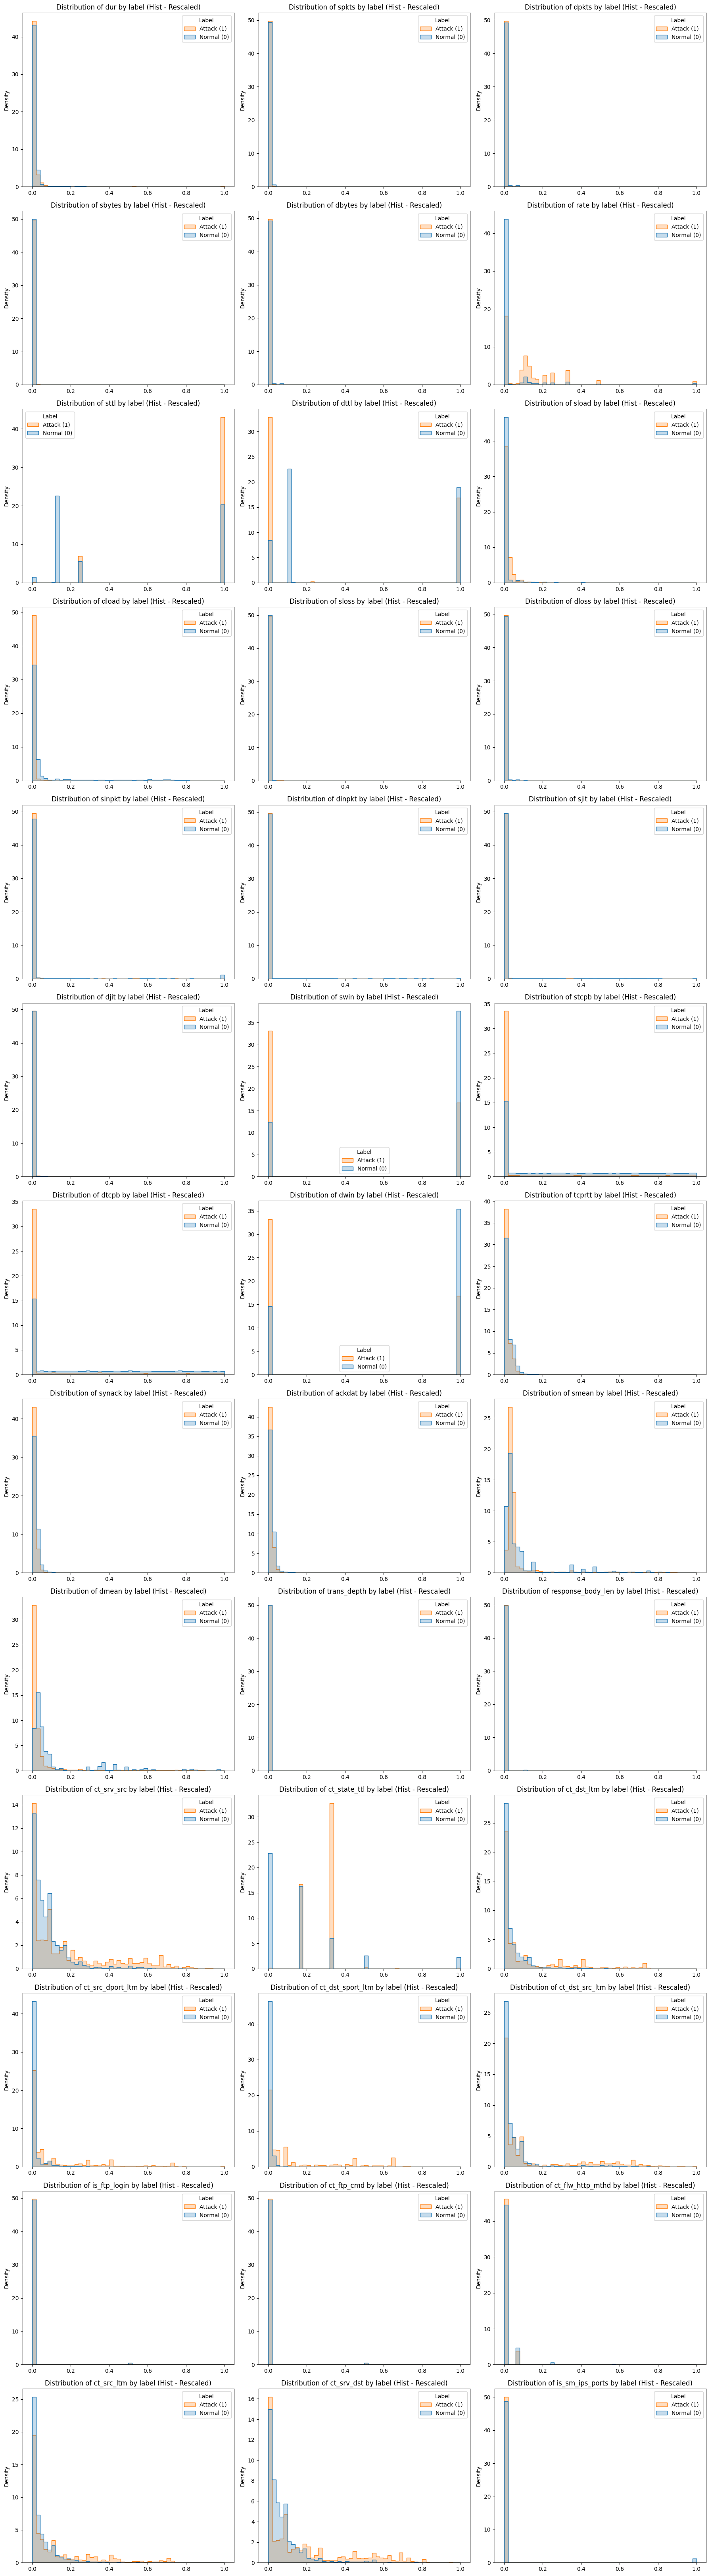


Density plots (KDE) for numerical features after rescaling


/tmp/ipython-input-166-1789963712.py:41: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df2, x=feature, hue=label_col, common_norm=False, ax=axes_kde_rescaled[idx], fill=True)


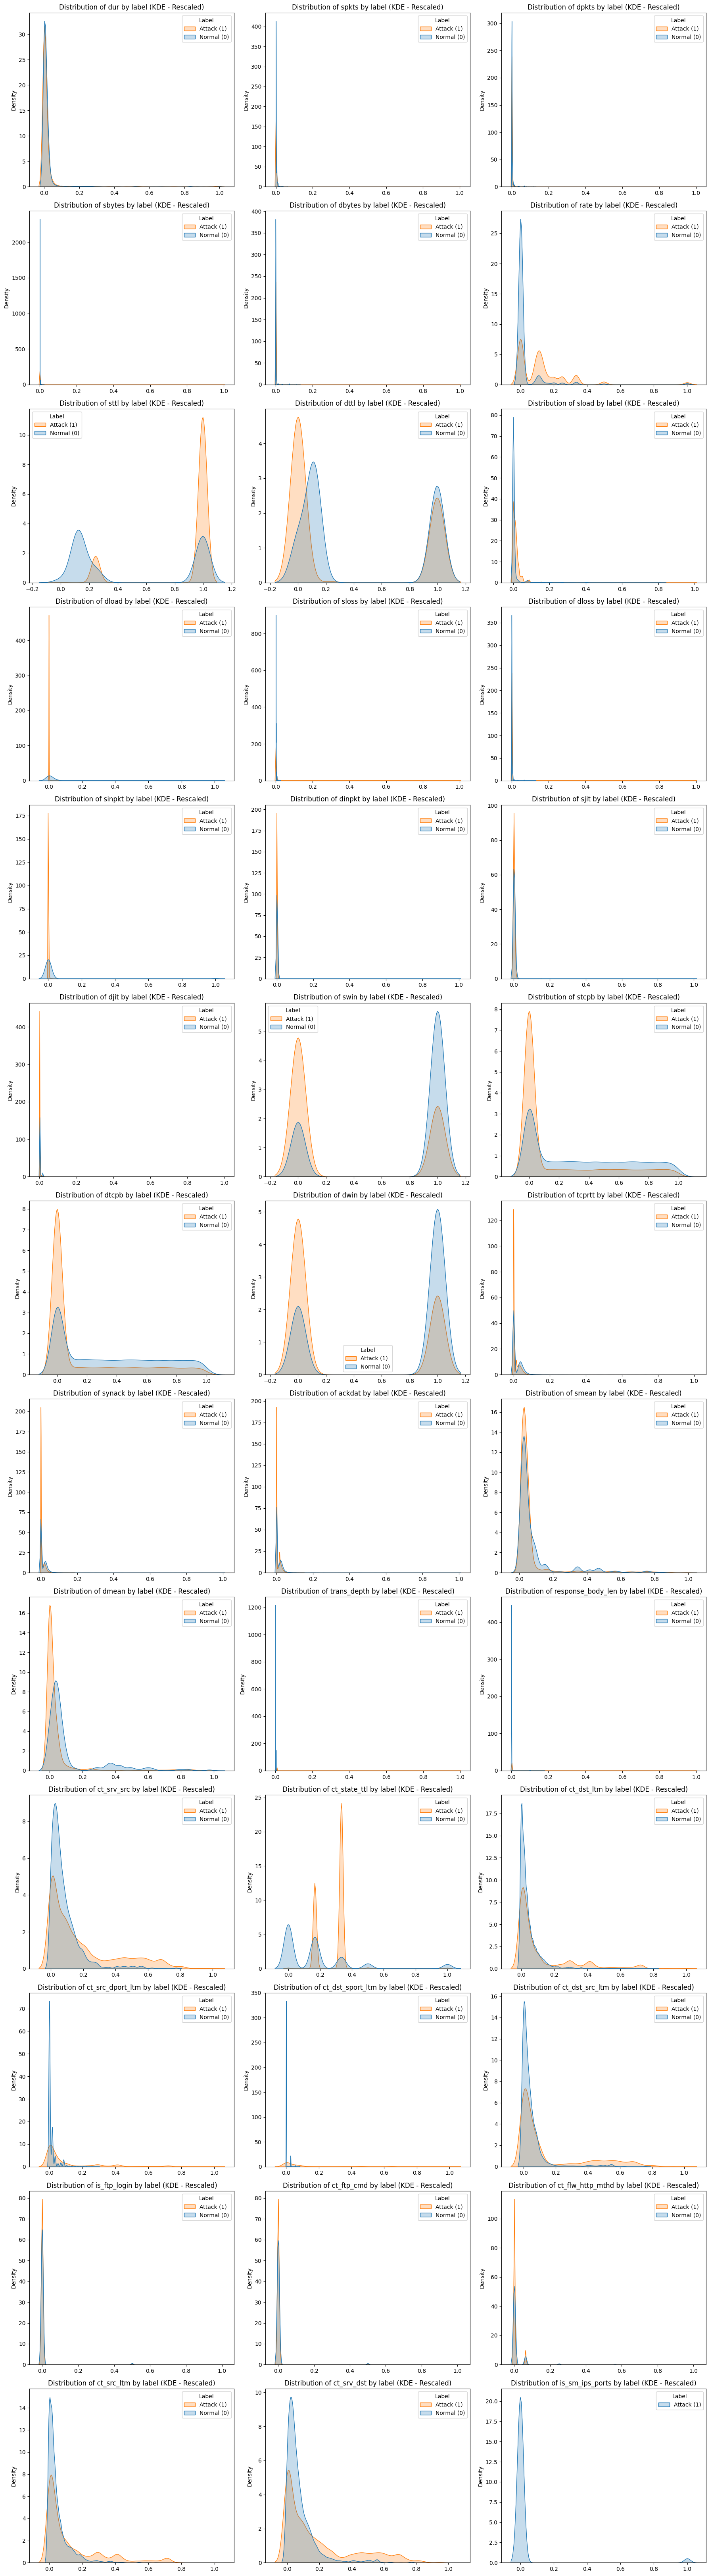

In [166]:
# Select numerical features from the rescaled dataframe, excluding the label
numerical_features_rescaled = df2.select_dtypes(include=np.number).columns.drop(label_col, errors='ignore')

# --- Histograms (After Rescaling) ---
if len(numerical_features_rescaled) > 0:
    print("Histograms for numerical features after rescaling")
    n_num_features = len(numerical_features_rescaled)
    n_cols = 3
    n_rows = (n_num_features + n_cols - 1) // n_cols

    num_bins = 50

    fig_hist_rescaled, axes_hist_rescaled = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
    axes_hist_rescaled = axes_hist_rescaled.flatten()

    for idx, feature in enumerate(numerical_features_rescaled):
        sns.histplot(data=df2, x=feature, hue=label_col, bins=num_bins, kde=False,
                     element="step", stat="density", common_norm=False, ax=axes_hist_rescaled[idx])
        axes_hist_rescaled[idx].set_title(f'Distribution of {feature} by label (Hist - Rescaled)')
        axes_hist_rescaled[idx].set_xlabel('')
        axes_hist_rescaled[idx].set_ylabel('Density')
        axes_hist_rescaled[idx].legend(title='Label', labels=['Attack (1)', 'Normal (0)'])

    for j in range(idx + 1, len(axes_hist_rescaled)):
        fig_hist_rescaled.delaxes(axes_hist_rescaled[j])

    plt.tight_layout()
    plt.show()

# --- Density Plots (KDE) (After Rescaling) ---
if len(numerical_features_rescaled) > 0:
    print("\nDensity plots (KDE) for numerical features after rescaling")
    n_num_features = len(numerical_features_rescaled)
    n_cols = 3
    n_rows = (n_num_features + n_cols - 1) // n_cols

    fig_kde_rescaled, axes_kde_rescaled = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
    axes_kde_rescaled = axes_kde_rescaled.flatten()

    for idx, feature in enumerate(numerical_features_rescaled):
        sns.kdeplot(data=df2, x=feature, hue=label_col, common_norm=False, ax=axes_kde_rescaled[idx], fill=True)
        axes_kde_rescaled[idx].set_title(f'Distribution of {feature} by label (KDE - Rescaled)')
        axes_kde_rescaled[idx].set_xlabel('')
        axes_kde_rescaled[idx].set_ylabel('Density')
        axes_kde_rescaled[idx].legend(title='Label', labels=['Attack (1)', 'Normal (0)'])
    for j in range(idx + 1, len(axes_kde_rescaled)):
        fig_kde_rescaled.delaxes(axes_kde_rescaled[j])

    plt.tight_layout()
    plt.show()

In [167]:
if len(numerical_features) > 0:
    range_data = []
    for feature in numerical_features:
        original_min = df[feature].min()
        original_max = df[feature].max()
        rescaled_min = df2[feature].min()
        rescaled_max = df2[feature].max()

        range_data.append({
            'Feature': feature,
            'Original Min': original_min,
            'Original Max': original_max,
            'Rescaled Min': rescaled_min,
            'Rescaled Max': rescaled_max
        })

    range_df = pd.DataFrame(range_data)
    print("Range of numerical features before and after rescaling:")
    display(range_df)
else:
    print("No numerical features to show range.")

Range of numerical features before and after rescaling:


Feature  Original Min  Original Max  Rescaled Min  Rescaled Max
0                 dur           0.0  5.999999e+01           0.0           1.0
1               spkts           1.0  1.064600e+04           0.0           1.0
2               dpkts           0.0  1.101800e+04           0.0           1.0
3              sbytes          24.0  1.435577e+07           0.0           1.0
4              dbytes           0.0  1.465753e+07           0.0           1.0
5                rate           0.0  1.000000e+06           0.0           1.0
6                sttl           0.0  2.550000e+02           0.0           1.0
7                dttl           0.0  2.530000e+02           0.0           1.0
8               sload           0.0  5.268000e+09           0.0           1.0
9               dload           0.0  2.082111e+07           0.0           1.0
10              sloss           0.0  5.319000e+03           0.0           1.0
11              dloss           0.0  5.507000e+03           0.0           1.0
12             sinpkt           0.0  6.000999e+04           0.0           1.0
13             dinpkt           0.0  5.773924e+04           0.0           1.0
14               sjit           0.0  1.483831e+06           0.0           1.0
15               djit           0.0  4.631992e+05           0.0           1.0
16               swin           0.0  2.550000e+02           0.0           1.0
17              stcpb           0.0  4.294950e+09           0.0           1.0
18              dtcpb           0.0  4.294881e+09           0.0           1.0
19               dwin           0.0  2.550000e+02           0.0           1.0
20             tcprtt           0.0  3.821465e+00           0.0           1.0
21             synack           0.0  3.226788e+00           0.0           1.0
22             ackdat           0.0  2.928778e+00           0.0           1.0
23              smean          24.0  1.504000e+03           0.0           1.0
24              dmean           0.0  1.500000e+03           0.0           1.0
25        trans_depth           0.0  1.310000e+02           0.0           1.0
26  response_body_len           0.0  5.242880e+06           0.0           1.0
27         ct_srv_src           1.0  6.300000e+01           0.0           1.0
28       ct_state_ttl           0.0  6.000000e+00           0.0           1.0
29         ct_dst_ltm           1.0  5.900000e+01           0.0           1.0
30   ct_src_dport_ltm           1.0  5.900000e+01           0.0           1.0
31   ct_dst_sport_ltm           1.0  3.800000e+01           0.0           1.0
32     ct_dst_src_ltm           1.0  6.300000e+01           0.0           1.0
33       is_ftp_login           0.0  2.000000e+00           0.0           1.0
34         ct_ftp_cmd           0.0  2.000000e+00           0.0           1.0
35   ct_flw_http_mthd           0.0  1.600000e+01           0.0           1.0
36         ct_src_ltm           1.0  6.000000e+01           0.0           1.0
37         ct_srv_dst           1.0  6.200000e+01           0.0           1.0
38    is_sm_ips_ports           0.0  1.000000e+00           0.0           1.0

## Encoding categorical features

Using label encoding instead of one-hot to reduce dimensionality. Although one-hot is generally the better approach because it avoids introducing a false sense of order that label encoding would create.

In [168]:
# Label encoding categorical features
from sklearn.preprocessing import LabelEncoder

categorical_features_rescaled = df2.select_dtypes(include='object').columns.tolist()
print("Categorical features in df_rescaled to label encode:", categorical_features_rescaled)

if len(categorical_features_rescaled) > 0:
    for feature in categorical_features_rescaled:
        le = LabelEncoder()
        df2[feature] = le.fit_transform(df2[feature])

    print("\ndf_rescaled after label encoding:")
    display(df2.head())

Categorical features in df_rescaled to label encode: ['proto', 'service', 'state', 'attack_cat']

df_rescaled after label encoding:


dur  proto  service  state     spkts  dpkts    sbytes  dbytes  \
0  1.833334e-07    117        0      4  0.000094    0.0  0.000033     0.0   
1  1.333334e-07    117        0      4  0.000094    0.0  0.000121     0.0   
2  8.333335e-08    117        0      4  0.000094    0.0  0.000073     0.0   
3  1.000000e-07    117        0      4  0.000094    0.0  0.000061     0.0   
4  1.666667e-07    117        0      4  0.000094    0.0  0.000146     0.0   

       rate      sttl  ...  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  \
0  0.090909  0.996078  ...               0.0        0.016129           0.0   
1  0.125000  0.996078  ...               0.0        0.016129           0.0   
2  0.200000  0.996078  ...               0.0        0.032258           0.0   
3  0.166667  0.996078  ...               0.0        0.032258           0.0   
4  0.100000  0.996078  ...               0.0        0.032258           0.0   

   ct_ftp_cmd  ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports  \
0         0.0               0.0    0.000000    0.016393              0.0   
1         0.0               0.0    0.000000    0.016393              0.0   
2         0.0               0.0    0.000000    0.032787              0.0   
3         0.0               0.0    0.016949    0.032787              0.0   
4         0.0               0.0    0.016949    0.032787              0.0   

   attack_cat  label  
0           6      0  
1           6      0  
2           6      0  
3           6      0  
4           6      0  

[5 rows x 44 columns]

# Tabular Prototype

## Problem Formulating

In [169]:
# finding duplicates
duplicated_rows = df2[df2.duplicated()]
num_duplicated_rows = duplicated_rows.shape[0]

print(f"Number of duplicated rows found: {num_duplicated_rows}")
if num_duplicated_rows > 0:
    print("\nDuplicated Rows:")
    display(duplicated_rows)
else:
    print("\nNo duplicated rows found in the DataFrame.")

Number of duplicated rows found: 26387

Duplicated Rows:


dur  proto  service  state     spkts  dpkts    sbytes  dbytes  \
10     0.000000e+00      6        0      4  0.000000    0.0  0.000002     0.0   
11     0.000000e+00      6        0      4  0.000000    0.0  0.000002     0.0   
39     9.999281e-01      6        0      4  0.000094    0.0  0.000005     0.0   
41     9.999281e-01      6        0      4  0.000094    0.0  0.000005     0.0   
53     2.474428e-01    111        0      5  0.001973    0.0  0.000067     0.0   
...             ...    ...      ...    ...       ...    ...       ...     ...   
82325  1.666667e-07    117        0      4  0.000094    0.0  0.000006     0.0   
82326  1.500000e-07    117        0      4  0.000094    0.0  0.000006     0.0   
82329  0.000000e+00      6        0      4  0.000000    0.0  0.000002     0.0   
82330  0.000000e+00      6        0      4  0.000000    0.0  0.000002     0.0   
82331  1.500000e-07    117        0      4  0.000094    0.0  0.000006     0.0   

               rate      sttl  ...  ct_dst_sport_ltm  ct_dst_src_ltm  \
10     0.000000e+00  0.000000  ...          0.027027        0.016129   
11     0.000000e+00  0.000000  ...          0.027027        0.016129   
39     1.666800e-08  0.000000  ...          0.027027        0.016129   
41     1.666800e-08  0.000000  ...          0.027027        0.016129   
53     1.414469e-06  0.996078  ...          0.054054        0.209677   
...             ...       ...  ...               ...             ...   
82325  1.000000e-01  0.996078  ...          0.000000        0.016129   
82326  1.111111e-01  0.996078  ...          0.000000        0.000000   
82329  0.000000e+00  0.000000  ...          0.000000        0.000000   
82330  0.000000e+00  0.000000  ...          0.000000        0.000000   
82331  1.111111e-01  0.996078  ...          0.000000        0.000000   

       is_ftp_login  ct_ftp_cmd  ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  \
10              0.0         0.0               0.0    0.016949    0.016393   
11              0.0         0.0               0.0    0.016949    0.016393   
39              0.0         0.0               0.0    0.016949    0.016393   
41              0.0         0.0               0.0    0.016949    0.016393   
53              0.0         0.0               0.0    0.033898    0.229508   
...             ...         ...               ...         ...         ...   
82325           0.0         0.0               0.0    0.000000    0.016393   
82326           0.0         0.0               0.0    0.000000    0.000000   
82329           0.0         0.0               0.0    0.000000    0.000000   
82330           0.0         0.0               0.0    0.000000    0.000000   
82331           0.0         0.0               0.0    0.000000    0.000000   

       is_sm_ips_ports  attack_cat  label  
10                 1.0           6      0  
11                 1.0           6      0  
39                 1.0           6      0  
41                 1.0           6      0  
53                 0.0           6      0  
...                ...         ...    ...  
82325              0.0           6      0  
82326              0.0           6      0  
82329              1.0           6      0  
82330              1.0           6      0  
82331              0.0           6      0  

[26387 rows x 44 columns]

I will be keeping duplicates since dropping them might remove valuable information about repeated malicious activities and worsen the class imbalance

## Baseline Models

In [170]:
# Split into train, validation, and test sets (60/20/20)
from sklearn.model_selection import train_test_split

# Split into features and target
X = df2.drop(columns=['label', 'attack_cat']) # Also drop attack_cat not needed for binary classification
y = df2['label']

X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, stratify=y_trainval, random_state=42)

In [171]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

def evaluate_model_performance(y_true, y_pred, model_name="Model"):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)
    conf_matrix = confusion_matrix(y_true, y_pred)
    class_report = classification_report(y_true, y_pred)

    print(f"{model_name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"ROC AUC Score: {roc_auc:.4f}")
    print("Confusion Matrix:")
    display(conf_matrix)
    print("\nClassification Report:")
    print(class_report)

    return {
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1,
        'ROC AUC': roc_auc
    }

In [172]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the Logistic Regression model
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_test = model.predict(X_test)

# Evaluate the model on the test set using the new function
lr_original_metrics = evaluate_model_performance(y_test, y_pred_test, model_name="Logistic Regression Baseline Model")

Logistic Regression Baseline Model Performance:
Accuracy: 0.8902
Precision: 0.8914
Recall: 0.9117
F1-score: 0.9014
ROC AUC Score: 0.8878
Confusion Matrix:


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[6393, 1007],
       [ 801, 8266]])


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.86      0.88      7400
           1       0.89      0.91      0.90      9067

    accuracy                           0.89     16467
   macro avg       0.89      0.89      0.89     16467
weighted avg       0.89      0.89      0.89     16467



In [173]:
from xgboost import XGBClassifier

# Initialize XGBClassifier
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_test_xgb = xgb_model.predict(X_test)

# Evaluate the model on the test set using the new function
xgb_original_metrics = evaluate_model_performance(y_test, y_pred_test_xgb, model_name="XGBoost Baseline Model")

XGBoost Baseline Model Performance:
Accuracy: 0.9769
Precision: 0.9851
Recall: 0.9728
F1-score: 0.9789
ROC AUC Score: 0.9774
Confusion Matrix:


array([[7267,  133],
       [ 247, 8820]])


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      7400
           1       0.99      0.97      0.98      9067

    accuracy                           0.98     16467
   macro avg       0.98      0.98      0.98     16467
weighted avg       0.98      0.98      0.98     16467



In [174]:
from sklearn.ensemble import RandomForestClassifier

# initiate a RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_test_rf = rf_model.predict(X_test)

# Evaluate the model on the test set using the new function
rf_original_metrics = evaluate_model_performance(y_test, y_pred_test_rf, model_name="Random Forest Baseline Model")

Random Forest Baseline Model Performance:
Accuracy: 0.9765
Precision: 0.9834
Recall: 0.9738
F1-score: 0.9786
ROC AUC Score: 0.9768
Confusion Matrix:


array([[7251,  149],
       [ 238, 8829]])


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      7400
           1       0.98      0.97      0.98      9067

    accuracy                           0.98     16467
   macro avg       0.98      0.98      0.98     16467
weighted avg       0.98      0.98      0.98     16467




*   The XGBoost model achieved the highest performance across all evaluated metrics on the test set
*   The Random Forest model also performed well on the test set
*   The Logistic Regression model showed the lowest performance among the three models.

## Feature Selection

In [175]:
# feature importance through correlation
correlation_matrix = df2.corr()
label_correlation = correlation_matrix['label'].abs().sort_values(ascending=False)
print("Absolute Correlation with 'label':")
display(label_correlation)

Absolute Correlation with 'label':


label                1.000000
attack_cat           0.638825
sttl                 0.504159
state                0.459040
swin                 0.414504
ct_dst_sport_ltm     0.393668
dwin                 0.369257
ct_src_dport_ltm     0.341513
rate                 0.328629
ct_state_ttl         0.318517
ct_srv_dst           0.292931
ct_srv_src           0.290195
dtcpb                0.282860
stcpb                0.281428
dload                0.280534
ct_dst_src_ltm       0.279989
ct_src_ltm           0.276494
ct_dst_ltm           0.257995
dmean                0.211544
synack               0.149944
tcprtt               0.148800
service              0.143634
sload                0.124548
sinpkt               0.120768
ackdat               0.120522
is_sm_ips_ports      0.117407
dttl                 0.098591
ct_flw_http_mthd     0.075028
dpkts                0.061515
smean                0.061146
dloss                0.044399
dinpkt               0.037585
dbytes               0.032632
spkts                0.027731
sjit                 0.027397
djit                 0.027131
trans_depth          0.025804
sbytes               0.020641
ct_ftp_cmd           0.017138
response_body_len    0.016414
is_ftp_login         0.016206
sloss                0.006360
proto                0.003497
dur                  0.001145
Name: label, dtype: float64

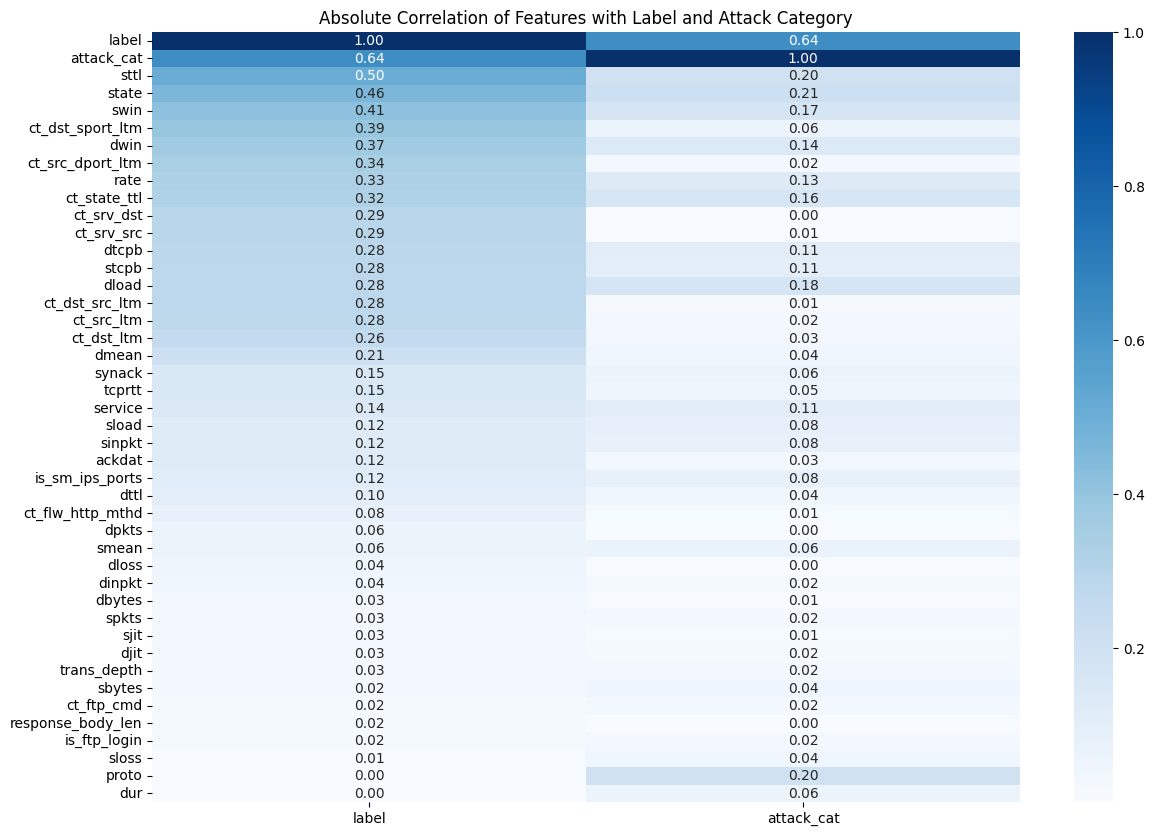

In [204]:
# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix[['label', 'attack_cat']].abs().sort_values(by='label', ascending=False), annot=True, cmap='Blues', fmt=".2f")
plt.title('Absolute Correlation of Features with Label and Attack Category')
plt.show()

In [176]:
# Choose a correlation threshold
correlation_threshold = 0.1

# Select features based on the threshold, excluding the label itself
selected_features = label_correlation[label_correlation > correlation_threshold].index.tolist()
if 'label' in selected_features:
    selected_features.remove('label')

if 'attack_cat' in selected_features:
    selected_features.remove('attack_cat')

print(f"Features with absolute correlation > {correlation_threshold} with 'label':")
print(selected_features)

Features with absolute correlation > 0.1 with 'label':
['sttl', 'state', 'swin', 'ct_dst_sport_ltm', 'dwin', 'ct_src_dport_ltm', 'rate', 'ct_state_ttl', 'ct_srv_dst', 'ct_srv_src', 'dtcpb', 'stcpb', 'dload', 'ct_dst_src_ltm', 'ct_src_ltm', 'ct_dst_ltm', 'dmean', 'synack', 'tcprtt', 'service', 'sload', 'sinpkt', 'ackdat', 'is_sm_ips_ports']


In [177]:
# split test/train/val for new df with selected features
X_train_selected = X_train[selected_features]
X_val_selected = X_val[selected_features]
X_test_selected = X_test[selected_features]

print("Shape of X_train_selected:", X_train_selected.shape)
print("Shape of X_val_selected:", X_val_selected.shape)
print("Shape of X_test_selected:", X_test_selected.shape)

Shape of X_train_selected: (49398, 24)
Shape of X_val_selected: (16467, 24)
Shape of X_test_selected: (16467, 24)


In [178]:
# Retrain on Logistic regression

model_lr_selected = LogisticRegression(random_state=42, max_iter=1000)
model_lr_selected.fit(X_train_selected, y_train)

# Make predictions on the test set using the retrained Logistic Regression model
y_pred_test_lr_selected = model_lr_selected.predict(X_test_selected)

# Evaluate the model
lr_selected_metrics = evaluate_model_performance(y_test, y_pred_test_lr_selected, model_name="Logistic Regression Model with Selected Features")

Logistic Regression Model with Selected Features Performance:
Accuracy: 0.8758
Precision: 0.9043
Recall: 0.8660
F1-score: 0.8847
ROC AUC Score: 0.8769
Confusion Matrix:


array([[6569,  831],
       [1215, 7852]])


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      7400
           1       0.90      0.87      0.88      9067

    accuracy                           0.88     16467
   macro avg       0.87      0.88      0.87     16467
weighted avg       0.88      0.88      0.88     16467



In [179]:
# Retrain xgboost with selected features
xgb_model_selected = XGBClassifier(random_state=42)
xgb_model_selected.fit(X_train_selected, y_train)

# Make predictions on the test set using the retrained XGBoost model
y_pred_test_xgb_selected = xgb_model_selected.predict(X_test_selected)

# Evaluate the model
xgb_selected_metrics = evaluate_model_performance(y_test, y_pred_test_xgb_selected, model_name="XGBoost Model with Selected Features")

XGBoost Model with Selected Features Performance:
Accuracy: 0.9681
Precision: 0.9722
Recall: 0.9697
F1-score: 0.9710
ROC AUC Score: 0.9679
Confusion Matrix:


array([[7149,  251],
       [ 275, 8792]])


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      7400
           1       0.97      0.97      0.97      9067

    accuracy                           0.97     16467
   macro avg       0.97      0.97      0.97     16467
weighted avg       0.97      0.97      0.97     16467



In [180]:
# Retrain Random Forest with selected features
rf_model_selected = RandomForestClassifier(random_state=42)
rf_model_selected.fit(X_train_selected, y_train)

# Make predictions on the test set using the retrained Random Forest model
y_pred_test_rf_selected = rf_model_selected.predict(X_test_selected)

# Evaluate the model
rf_selected_metrics = evaluate_model_performance(y_test, y_pred_test_rf_selected, model_name="Random Forest Model with Selected Features")

Random Forest Model with Selected Features Performance:
Accuracy: 0.9675
Precision: 0.9702
Recall: 0.9708
F1-score: 0.9705
ROC AUC Score: 0.9671
Confusion Matrix:


array([[7130,  270],
       [ 265, 8802]])


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      7400
           1       0.97      0.97      0.97      9067

    accuracy                           0.97     16467
   macro avg       0.97      0.97      0.97     16467
weighted avg       0.97      0.97      0.97     16467



Analysis -------------------------------

*   Comparing the models with and without feature selection, all models (Logistic Regression, XGBoost, and Random Forest) showed a decrease in Accuracy, Precision, Recall, F1-score, and ROC AUC when trained on the selected features compared to training on all features.

*   Feature selection, in this case, did not improve model performance and resulted in a decrease across all evaluated metrics for all models.
*   Despite the performance decrease with selected features, XGBoost and Random Forest still outperform Logistic Regression, suggesting that tree-based models are more suitable for this dataset.


## Feature Engineering

In [181]:
# Create 2 new features: packet and byte ratios
df2['pkt_ratio'] = df2['dpkts'] / (df2['spkts'] + df2['dpkts'] + 1e-6)
df2['byte_ratio'] = df2['dbytes'] / (df2['sbytes'] + df2['dbytes'] + 1e-6)

print("DataFrame with new features:")
display(df2[['spkts', 'dpkts', 'pkt_ratio', 'sbytes', 'dbytes', 'byte_ratio']].head())

DataFrame with new features:


spkts  dpkts  pkt_ratio    sbytes  dbytes  byte_ratio
0  0.000094    0.0        0.0  0.000033     0.0         0.0
1  0.000094    0.0        0.0  0.000121     0.0         0.0
2  0.000094    0.0        0.0  0.000073     0.0         0.0
3  0.000094    0.0        0.0  0.000061     0.0         0.0
4  0.000094    0.0        0.0  0.000146     0.0         0.0

In [182]:
df2.shape

(82332, 46)

In [183]:
# Split into train, validation, and test sets with engineered features
X_engineered = df2.drop(columns=['label', 'attack_cat']) # Also drop attack_cat not needed for binary classification
y_engineered = df2['label']

X_trainval_engineered, X_test_engineered, y_trainval_engineered, y_test_engineered = train_test_split(X_engineered, y_engineered, test_size=0.2, stratify=y_engineered, random_state=42)
X_train_engineered, X_val_engineered, y_train_engineered, y_val_engineered = train_test_split(X_trainval_engineered, y_trainval_engineered, test_size=0.25, stratify=y_trainval_engineered, random_state=42)

In [184]:
# Initialize and retrain the Logistic Regression model with engineered features
model_lr_engineered = LogisticRegression(random_state=42, max_iter=1000)
model_lr_engineered.fit(X_train_engineered, y_train_engineered)

# Make predictions on the test set
y_pred_test_lr_engineered = model_lr_engineered.predict(X_test_engineered)

# Evaluate the model
lr_engineered_metrics = evaluate_model_performance(y_test_engineered, y_pred_test_lr_engineered, model_name="Logistic Regression Model with Engineered Features")

Logistic Regression Model with Engineered Features Performance:
Accuracy: 0.8889
Precision: 0.8893
Recall: 0.9117
F1-score: 0.9003
ROC AUC Score: 0.8863
Confusion Matrix:


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[6371, 1029],
       [ 801, 8266]])


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.86      0.87      7400
           1       0.89      0.91      0.90      9067

    accuracy                           0.89     16467
   macro avg       0.89      0.89      0.89     16467
weighted avg       0.89      0.89      0.89     16467



In [185]:
# Retrain xgboost model with engineered features
xgb_model_engineered = XGBClassifier(random_state=42)
xgb_model_engineered.fit(X_train_engineered, y_train_engineered)

# Make predictions using the retrained XGBoost model
y_pred_test_xgb_engineered = xgb_model_engineered.predict(X_test_engineered)

# Evaluate the model
xgb_engineered_metrics = evaluate_model_performance(y_test_engineered, y_pred_test_xgb_engineered, model_name="XGBoost Model with Engineered Features")

XGBoost Model with Engineered Features Performance:
Accuracy: 0.9784
Precision: 0.9861
Recall: 0.9745
F1-score: 0.9803
ROC AUC Score: 0.9788
Confusion Matrix:


array([[7275,  125],
       [ 231, 8836]])


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      7400
           1       0.99      0.97      0.98      9067

    accuracy                           0.98     16467
   macro avg       0.98      0.98      0.98     16467
weighted avg       0.98      0.98      0.98     16467



In [186]:
# Retrain Random Forest model with engineered features
rf_model_engineered = RandomForestClassifier(random_state=42)
rf_model_engineered.fit(X_train_engineered, y_train_engineered)

# Make predictions using the retrained Random Forest model
y_pred_test_rf_engineered = rf_model_engineered.predict(X_test_engineered)

# Evaluate the model
rf_engineered_metrics = evaluate_model_performance(y_test_engineered, y_pred_test_rf_engineered, model_name="Random Forest Model with Engineered Features")

Random Forest Model with Engineered Features Performance:
Accuracy: 0.9752
Precision: 0.9834
Recall: 0.9713
F1-score: 0.9773
ROC AUC Score: 0.9756
Confusion Matrix:


array([[7251,  149],
       [ 260, 8807]])


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      7400
           1       0.98      0.97      0.98      9067

    accuracy                           0.98     16467
   macro avg       0.97      0.98      0.97     16467
weighted avg       0.98      0.98      0.98     16467



Analysis -------------------------------
*   Comparing the models with and without feature engineering, all models (Logistic Regression, XGBoost, and Random Forest) showed a increase in atleast one metric when trained with additional features compared to the baseline models.

*   Feature engineering, in this case, did improve model performance on some more than others for some of the metrics.
*   XGBoost and Random Forest still outperformed Logistic Regression.

## Comparing the models

In [187]:
# Collect the metrics from each model
all_metrics = [
    lr_original_metrics,
    xgb_original_metrics,
    rf_original_metrics,
    lr_selected_metrics,
    xgb_selected_metrics,
    rf_selected_metrics,
    lr_engineered_metrics,
    xgb_engineered_metrics,
    rf_engineered_metrics
]

# Create the comparison DataFrame
combined_comparison_df = pd.DataFrame(all_metrics)

print("Model Performance Comparison (Original, Selected, and Engineered Features):")
display(combined_comparison_df)

Model Performance Comparison (Original, Selected, and Engineered Features):


Model  Accuracy  Precision  \
0                 Logistic Regression Baseline Model  0.890205   0.891405   
1                             XGBoost Baseline Model  0.976924   0.985145   
2                       Random Forest Baseline Model  0.976498   0.983404   
3   Logistic Regression Model with Selected Features  0.875752   0.904296   
4               XGBoost Model with Selected Features  0.968057   0.972244   
5         Random Forest Model with Selected Features  0.967511   0.970238   
6  Logistic Regression Model with Engineered Feat...  0.888869   0.889295   
7             XGBoost Model with Engineered Features  0.978381   0.986051   
8       Random Forest Model with Engineered Features  0.975162   0.983363   

     Recall  F1-score   ROC AUC  
0  0.911658  0.901418  0.887788  
1  0.972758  0.978912  0.977393  
2  0.973751  0.978554  0.976808  
3  0.865998  0.884732  0.876850  
4  0.969670  0.970955  0.967876  
5  0.970773  0.970506  0.967143  
6  0.911658  0.900338  0.886302  
7  0.974523  0.980253  0.978816  
8  0.971325  0.977307  0.975595

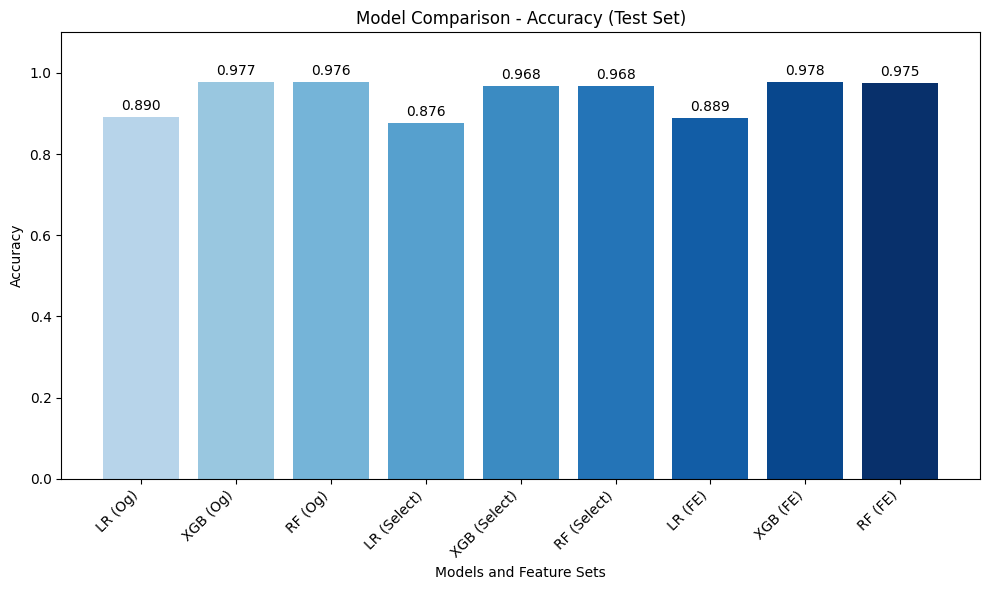

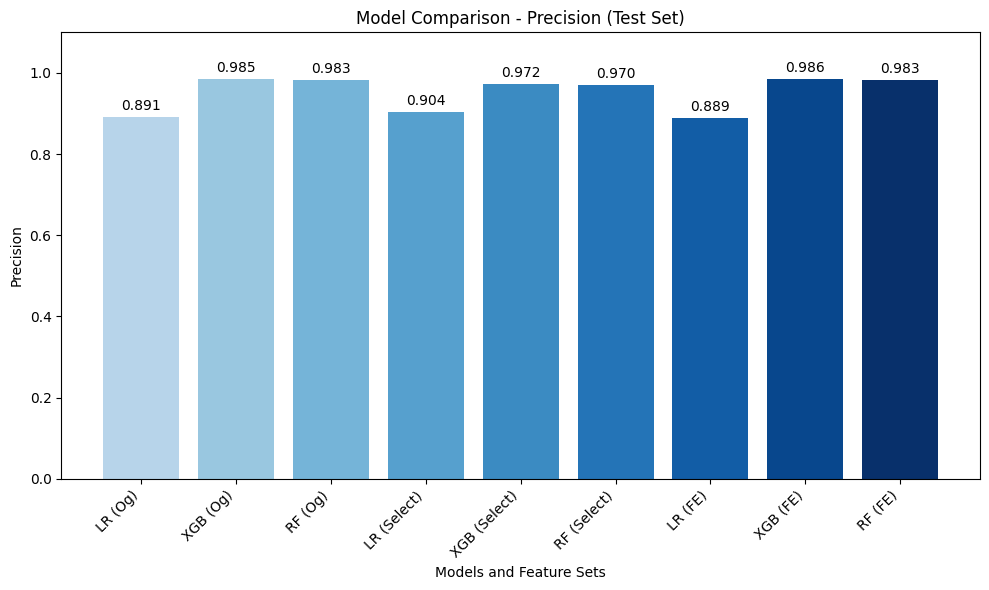

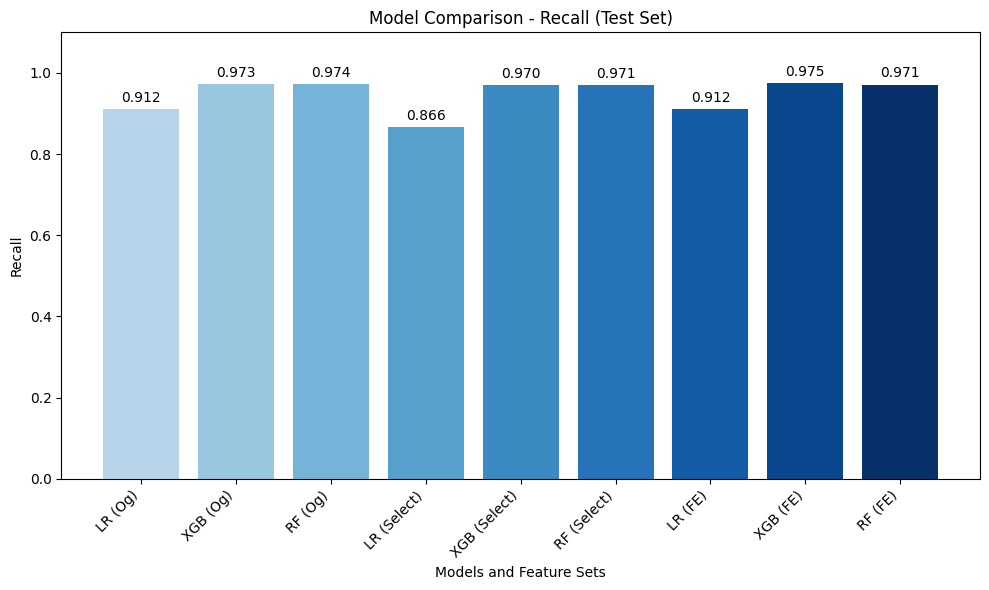

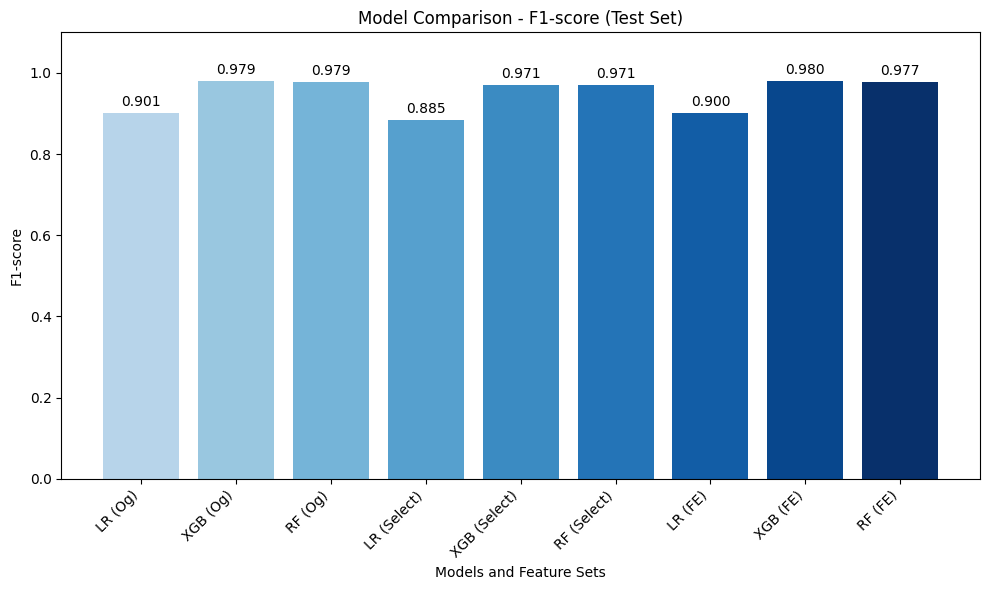

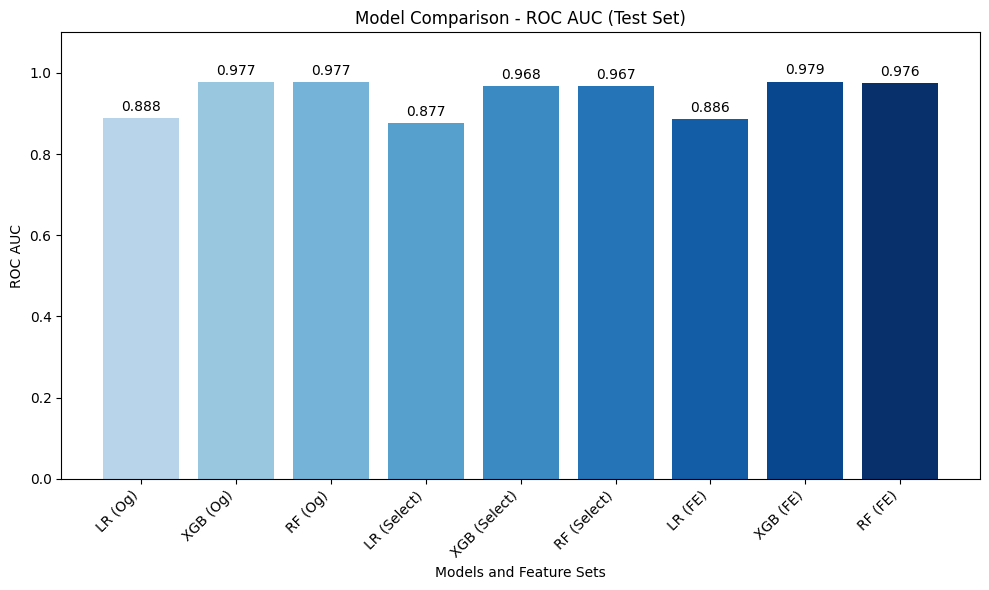

In [195]:
comparison_metrics_for_plotting = combined_comparison_df[~combined_comparison_df['Model'].str.contains("Validation")].copy()

# Shorten model names for better plotting
model_name_mapping = {
    "Logistic Regression Baseline Model": "LR (Og)",
    "XGBoost Baseline Model": "XGB (Og)",
    "Random Forest Baseline Model": "RF (Og)",
    "Logistic Regression Model with Selected Features": "LR (Select)",
    "XGBoost Model with Selected Features": "XGB (Select)",
    "Random Forest Model with Selected Features": "RF (Select)",
    "Logistic Regression Model with Engineered Features": "LR (FE)",
    "XGBoost Model with Engineered Features": "XGB (FE)",
    "Random Forest Model with Engineered Features": "RF (FE)"
}
comparison_metrics_for_plotting['Model'] = comparison_metrics_for_plotting['Model'].map(model_name_mapping)


metrics_to_plot = comparison_metrics_for_plotting.columns.drop('Model')

cmap = plt.cm.Blues
num_models = len(comparison_metrics_for_plotting)
colors = [cmap(i) for i in np.linspace(0.3, 1, num_models)]

for metric_name in metrics_to_plot:
    fig, ax = plt.subplots(figsize=(10, 6))
    bars = ax.bar(comparison_metrics_for_plotting['Model'], comparison_metrics_for_plotting[metric_name], color=colors)
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.3f}',
                ha='center', va='bottom')
    ax.set_xlabel('Models and Feature Sets')
    ax.set_ylabel(metric_name)
    ax.set_title(f'Model Comparison - {metric_name} (Test Set)')
    ax.set_ylim(0, 1.1)
    ax.set_xticks(range(len(comparison_metrics_for_plotting['Model'])))
    ax.set_xticklabels(comparison_metrics_for_plotting['Model'], rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

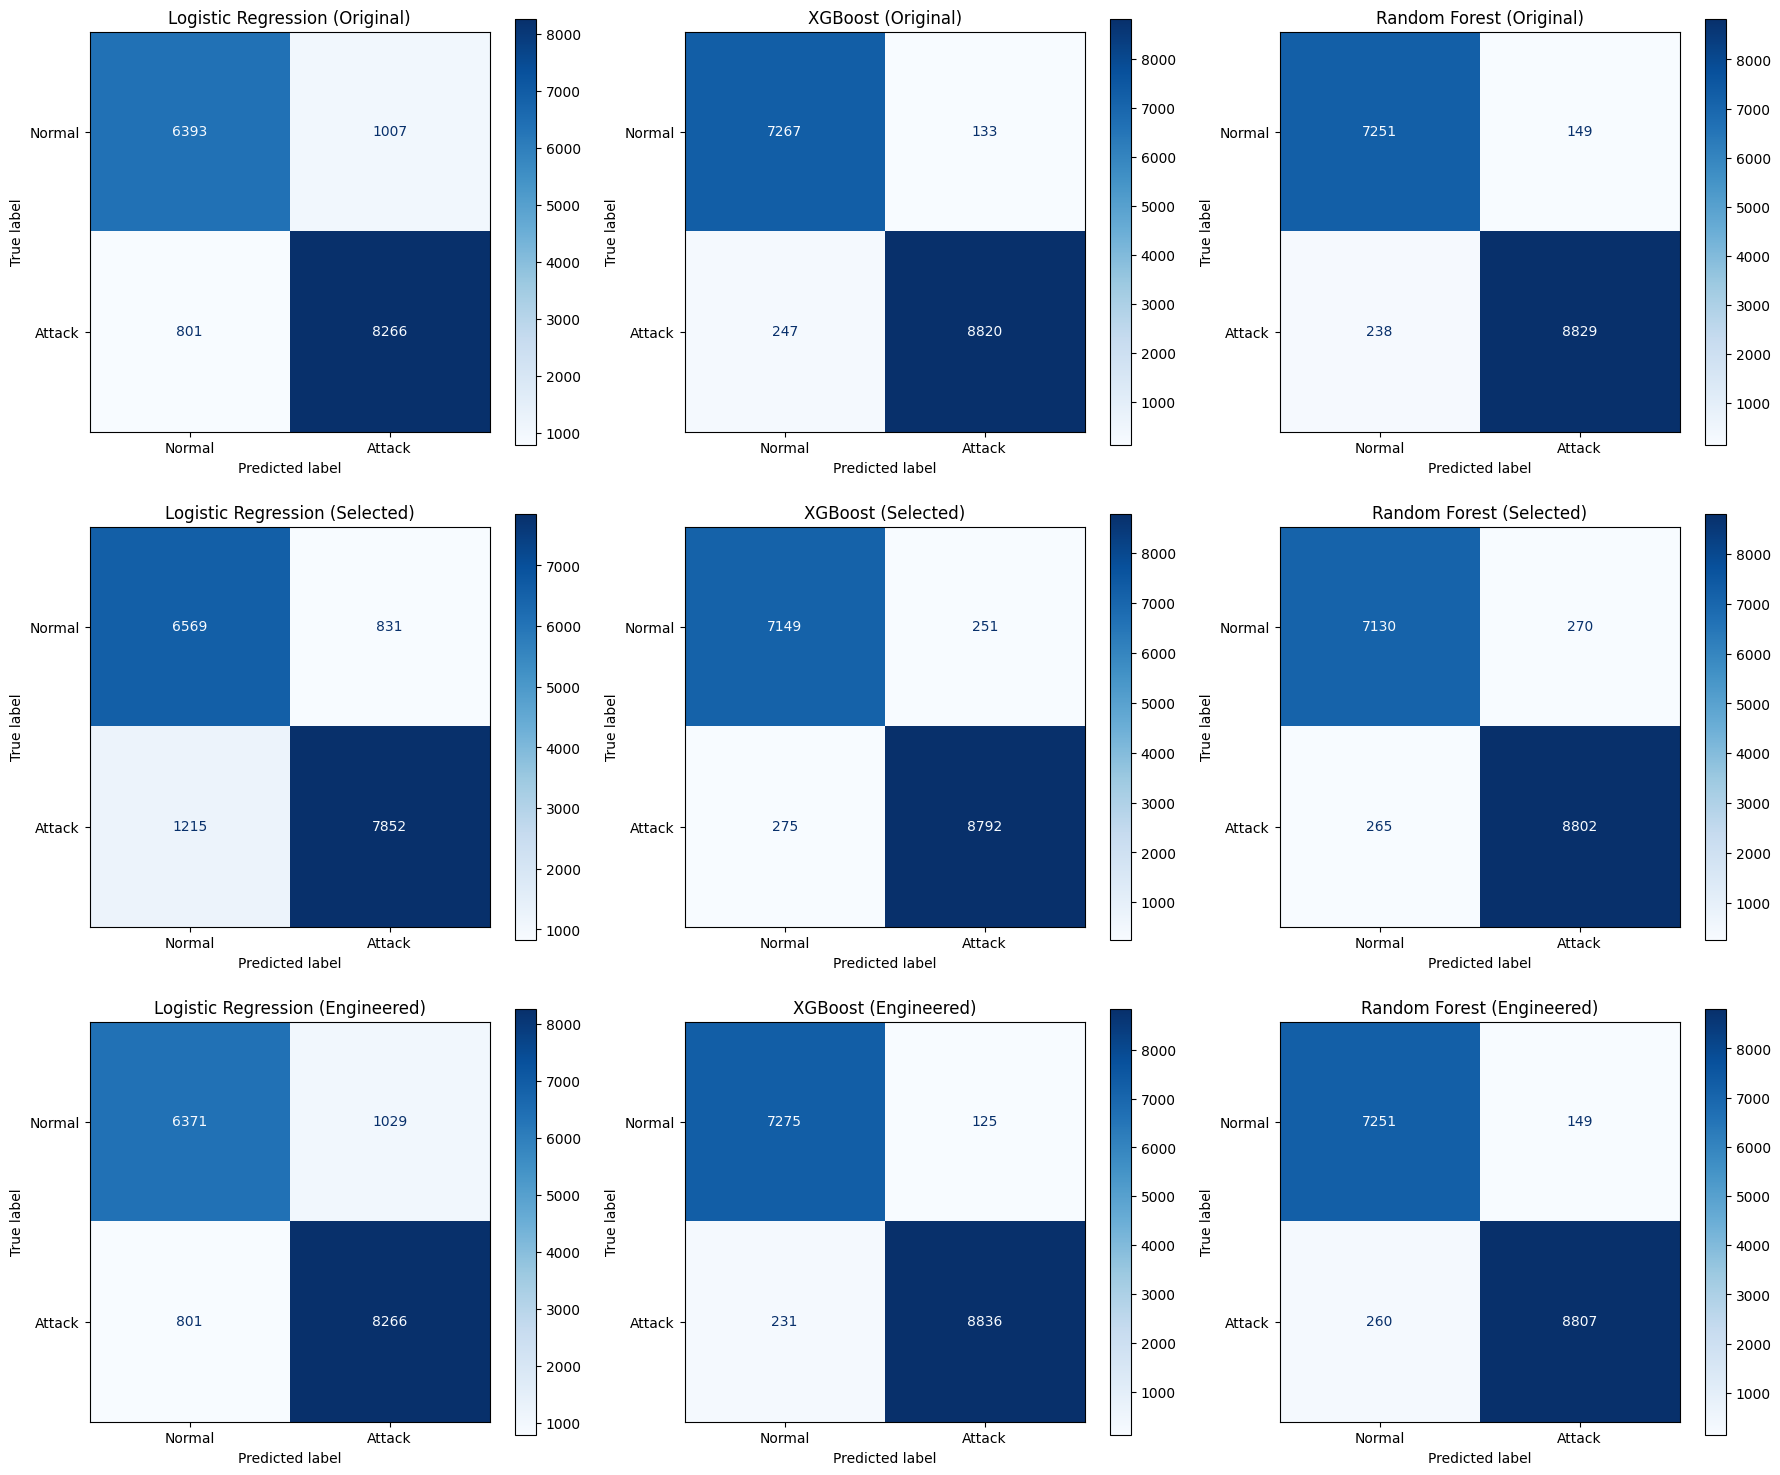

In [189]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Create a dictionary of models and their corresponding test data
models_and_test_data = {
    "Logistic Regression (Original)": (model, X_test, y_test),
    "XGBoost (Original)": (xgb_model, X_test, y_test),
    "Random Forest (Original)": (rf_model, X_test, y_test),

    "Logistic Regression (Selected)": (model_lr_selected, X_test_selected, y_test),
    "XGBoost (Selected)": (xgb_model_selected, X_test_selected, y_test),
    "Random Forest (Selected)": (rf_model_selected, X_test_selected, y_test),

    "Logistic Regression (Engineered)": (model_lr_engineered, X_test_engineered, y_test_engineered),
    "XGBoost (Engineered)": (xgb_model_engineered, X_test_engineered, y_test_engineered),
    "Random Forest (Engineered)": (rf_model_engineered, X_test_engineered, y_test_engineered),
}

n_models = len(models_and_test_data)
n_cols = 3
n_rows = (n_models + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten()

# Plot confusion matrix for each model
for i, (model_name, (model, X_test_data, y_test_data)) in enumerate(models_and_test_data.items()):
    try:
        y_pred = model.predict(X_test_data)
        cm = confusion_matrix(y_test_data, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal', 'Attack'])
        disp.plot(ax=axes[i], cmap=plt.cm.Blues)
        disp.ax_.set_title(model_name)
    except ValueError as e:
        axes[i].axis('off')
        axes[i].text(0.5, 0.5, f"Error:\n{e}", ha='center', va='center', wrap=True)
        axes[i].set_title(model_name)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()


**Summary** -------------------------------
* After comparing all the models it can be seen that XGBoost performed the best across all metrics for all the models. The XGBoost Model with engineered features was the overall best performing having the best metrics and the best confusion matrix overall.
* This model will be used to evaluate the validation sample and the main metric that will be used to determine the overall performance will be the F1 score.


## Evaluate Performance on Validation Sample

In [191]:
# Make predictions on the validation set using the trained XGBoost model with engineered features
y_pred_val_xgb_engineered = xgb_model_engineered.predict(X_val_engineered)

# Evaluate the model on the validation set using the new function
xgb_engineered_validation_metrics = evaluate_model_performance(y_val_engineered, y_pred_val_xgb_engineered, model_name="XGBoost Model with Engineered Features on Validation Set")

XGBoost Model with Engineered Features on Validation Set Performance:
Accuracy: 0.9807
Precision: 0.9869
Recall: 0.9781
F1-score: 0.9824
ROC AUC Score: 0.9811
Confusion Matrix:


array([[7282,  118],
       [ 199, 8868]])


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      7400
           1       0.99      0.98      0.98      9067

    accuracy                           0.98     16467
   macro avg       0.98      0.98      0.98     16467
weighted avg       0.98      0.98      0.98     16467



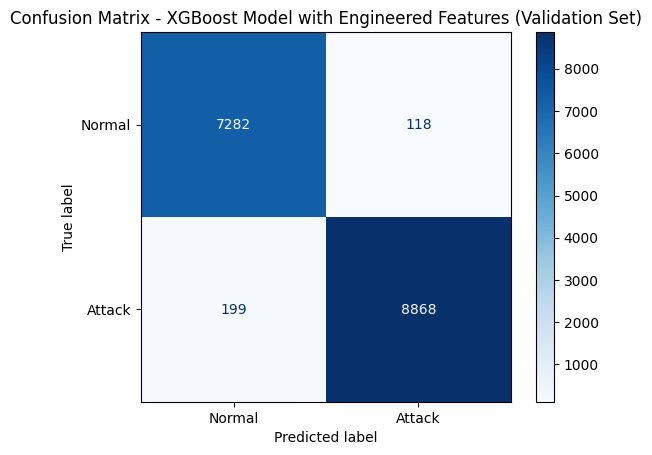

In [193]:
# Calculate the confusion matrix
cm_val = confusion_matrix(y_val_engineered, y_pred_val_xgb_engineered)

# Display the confusion matrix
disp_val = ConfusionMatrixDisplay(confusion_matrix=cm_val, display_labels=['Normal', 'Attack'])
disp_val.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - XGBoost Model with Engineered Features (Validation Set)')
plt.show()

**Final Analysis** --------------------


Based on the evaluation of the XGBoost model with engineered features on the validation set the model demonstrates strong performance in detecting threats in network traffic.

The F1-score of 0.9824 is particularly important as it balances Precision and Recall, providing a good measure of the model's effectiveness in correctly identifying both normal and attack sessions, which is crucial for network threat detection.

The confusion matrix for the validation set provides further insight:
- **True Positives (Attack correctly identified):** 7282
- **True Negatives (Normal correctly identified):** 8868
- **False Positives (Normal incorrectly identified as Attack):** 118
- **False Negatives (Attack incorrectly identified as Normal):** 199

The high number of True Positives and True Negatives, paired with  low False Positives and False Negatives, indicates that the model is effective at distinguishing between normal and malicious network traffic. The F1-score on the validation set is very close to the F1-score observed on the test set (0.980), suggesting that the model generalizes well and is not significantly overfitting to the training data.

Overall, the XGBoost model with engineered features appears to be a robust and effective solution for this binary classification task of detecting network threats.